# Statistical Analysis with R

## Simple statistics on simulated samples
> Study of the different modes of graphical description in the continuous and discrete cases as well as probability calculations.
> ***
> ### Continuous probability distribution
> The aim here is to simulate samples x of various sizes of $n$ of different distributions to analyze the results of the unbiased estimates of the mean and the variance as well as the distribution of the realizations of the sample.

In [79]:
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 150)

> ***
> #### $U_{[a,b]}$ distribution with $a = -1$ and $b = 2$
> - Distriution parameters.

In [80]:
a <- -1
b <- 2
m <- (a+b)/2
v <- ((b-a)^2)/12

> - Unbiased estimators.

In [81]:
n <- 10000
x <- runif(n=n, min=a, max=b)
m.est <- mean(x) 
v.est <- var(x)

> - Comparing the value of the unbiased estimator with its respective parameter for a sample of size $n$.

In [82]:
cat("Mean: ", m," | Unbiased estimator: ", m.est, "\nSDev: ", v,"| Unbiased estimator: ", v.est)

Mean:  0.5  | Unbiased estimator:  0.5038043 
SDev:  0.75 | Unbiased estimator:  0.7528465

> - Plotting the distribution of the sample of size $n$.

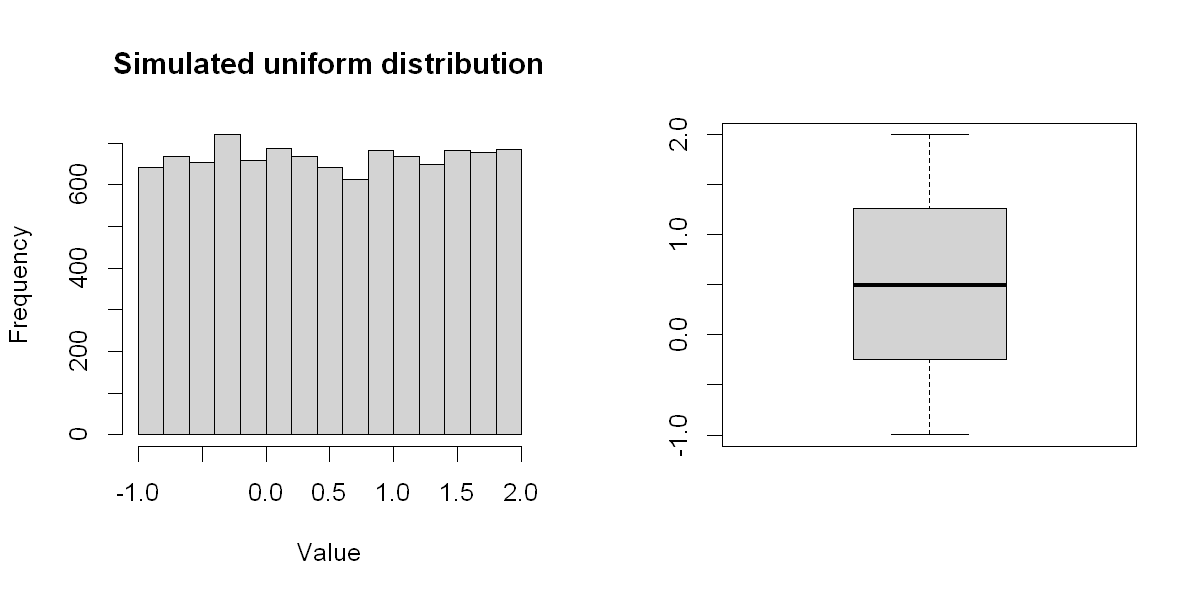

In [83]:
par(mfrow=c(1,2))
hist(x, main="Simulated uniform distribution", xlab="Value", ylab="Frequency")
boxplot(x)

>***
> #### $N_{(m, \sigma^2)}$ distribution with $m = -2$ and $\sigma = 1$
> - Distribution parameters.

In [84]:
m <- -2
v <- 1

> - Unbiased estimators.

In [85]:
n <- 10000
x <- rnorm(n=n, mean=m, sd=sqrt(v))
m.est <- mean(x) 
v.est <- var(x)

> - Comparing the value of the unbiased estimator with its respective parameter for a sample of size $n$.

In [86]:
cat("Mean:", m,"| Unbiased estimator:", m.est, "\nSDev: ", v,"| Unbiased estimator: ", v.est)

Mean: -2 | Unbiased estimator: -2.008057 
SDev:  1 | Unbiased estimator:  1.004456

> - Plotting the distribution of the sample of size $n$.

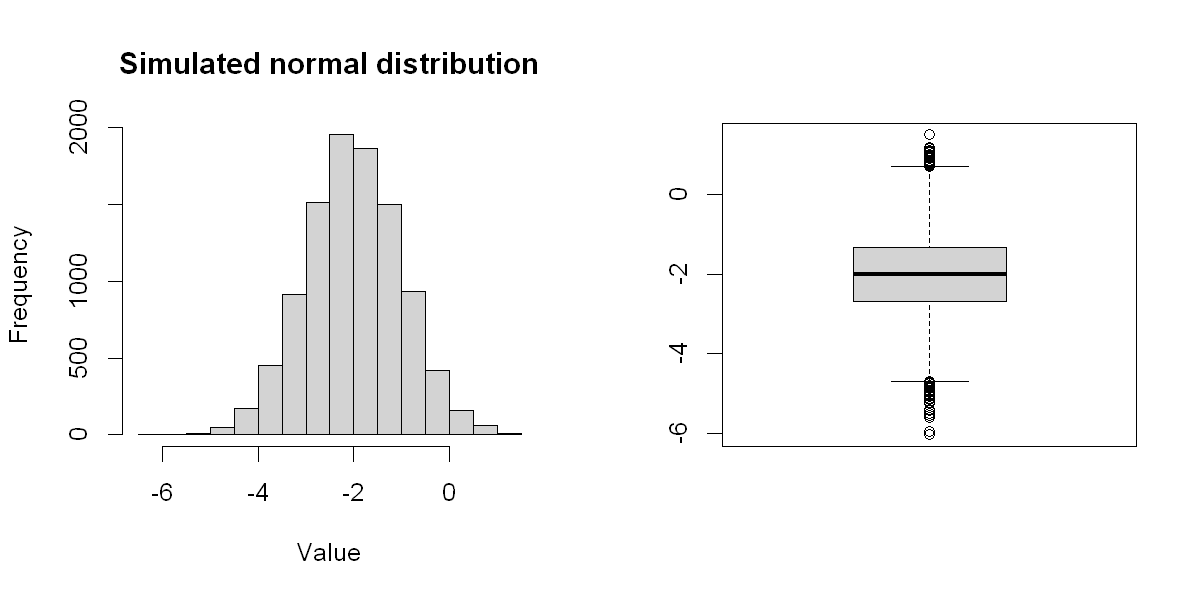

In [87]:
par(mfrow=c(1,2))
hist(x, main="Simulated normal distribution", xlab="Value", ylab="Frequency")
boxplot(x)

***
## Asymptotic behavior of estimators 
> Descriptive statistics, histograms, frequency distributions of samples of estimators.
> ***
> ### Frequency estimation
> - Probability distribution within t set of solution $\Omega$

In [88]:
omegax <- c(-1,0,1)
px <- c(0.5,0.15,0.35)

> - Use of empirical probability $f_i\frac{n_i}{\sum_{j}n_{j}}$.

In [89]:
freq.abs <- function (x,valeur) {return (length(which(x==valeur)))}
p.est <- NULL
x <- NULL

> - Plotting the **asymptoctic behavior** of the **frequency estimation**.

In [90]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res = 150)

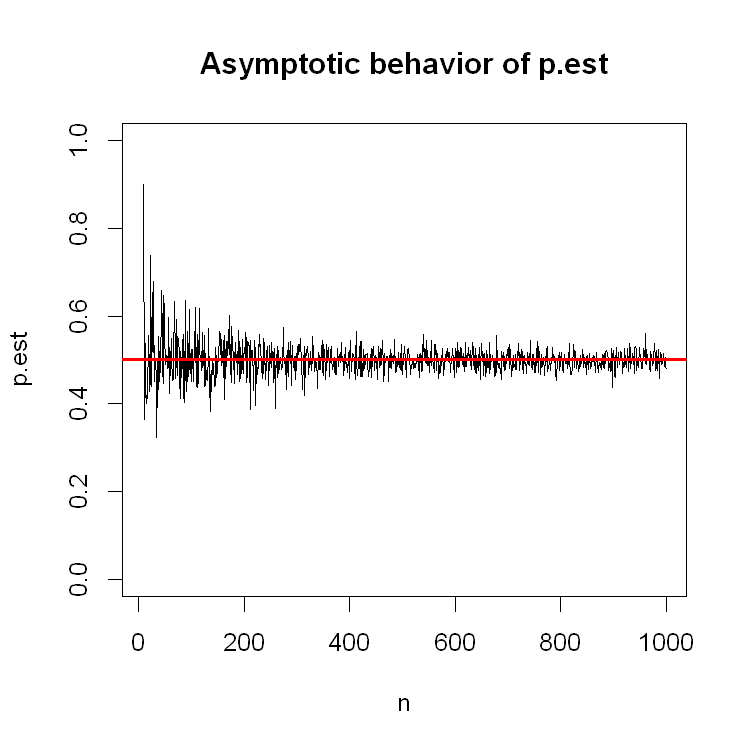

In [91]:
for(n in 10:1000) {
    x <- sample(omegax,n,TRUE,px)
    p.est <- c(p.est,freq.abs(x,-1)/n)
}
n <- 10:1000
plot(n,p.est, main="Asymptotic behavior of p.est", xlab="n", ylab="p.est", type='l', ylim=c(0,1))
abline(h=0.5,col="red",lwd=2)

> ***
> ### Simulation and estimation of the standard deviation for a $N(\mu,\sigma ^2)$ distribution

In [92]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res = 180)

> - Parameters.

In [93]:
ds1 <- NULL
ds2 <- NULL
ds3 <- NULL
n <- 100
K <- 100
m <- 2
sigma <- 0.1

> - Computation of three different estimators of $\sigma$.

In [94]:
for (k in 1:K) { 
    x <- rnorm(n=n,mean=m,sd=sigma)
    ds1 <- c(ds1, sum((x-mean(x))^2)/n)
    ds2 <- c(ds2, sum((x-mean(x))^2)/(n-1))
    ds3 <- c(ds3, sum((x-m)^2)/n)
}

> - Plotting the different estimation samples compared to $\sigma$ (horizontal line).

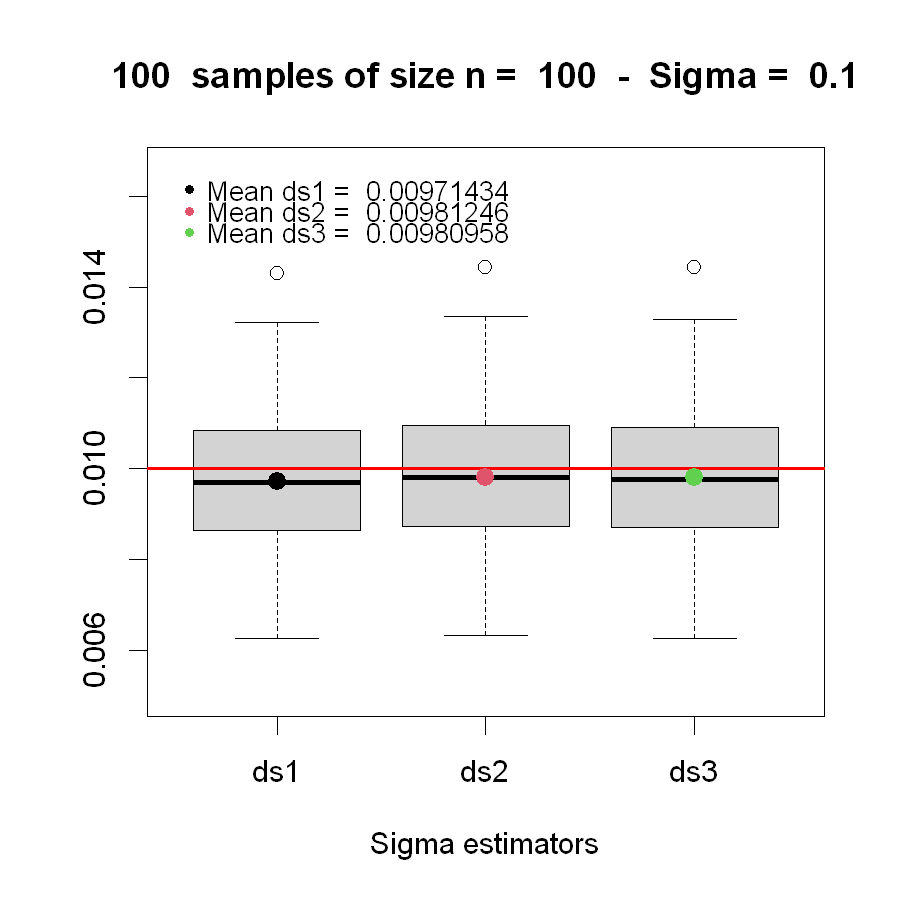

In [95]:
boxplot(c(ds1,ds2,ds3)~rep(c("ds1","ds2","ds3"),each=K),
        ylim=c(min(c(ds1,ds2,ds3))*0.8,max(c(ds1,ds2,ds3))*1.15),
        range=1.5,
        xlab="Sigma estimators",
        ylab="")

abline(h=sigma^2,col="red",lwd=2)

points(1:3,
       c(mean(ds1),mean(ds2),mean(ds3)),
       pch=20,
       col=1:3,
       cex=2) 

title(paste(K, " samples of size n = ",n," -  Sigma = ",sigma))

legend(0.5,
       max(c(ds1,ds2,ds3)*1.15),
       legend=c(paste("Mean ds1 = ",round(mean(ds1),digits=8)),
                paste("Mean ds2 = ",round(mean(ds2),digits=8)),
                paste("Mean ds3 = ",round(mean(ds3),digits=8))),
                pch=20,col=1:3,pt.cex=1,cex=0.9,bty="n")

> ***
> ### Simulation and estimation for a $P(\lambda)$ distribution

In [96]:
options(repr.plot.width=12, repr.plot.height=3, repr.plot.res = 180)

> - Parameters.

In [97]:
K <- 1000
N <- c(5,10,25,50,100,500,1000)
m <- NULL 
sigma2 <- NULL 
lambda <- 1

> - Computation of the estimators for different samples of size $n$.

In [98]:
for (n in N) {
    for (k in 1:K) { x <-rpois(n=n,lambda=1); m <- c(m,mean(x)); sigma2 <- c(sigma2,var(x)) }
}

> - Plotting the estimation of $m$ and $\sigma$ for different sample sizes.

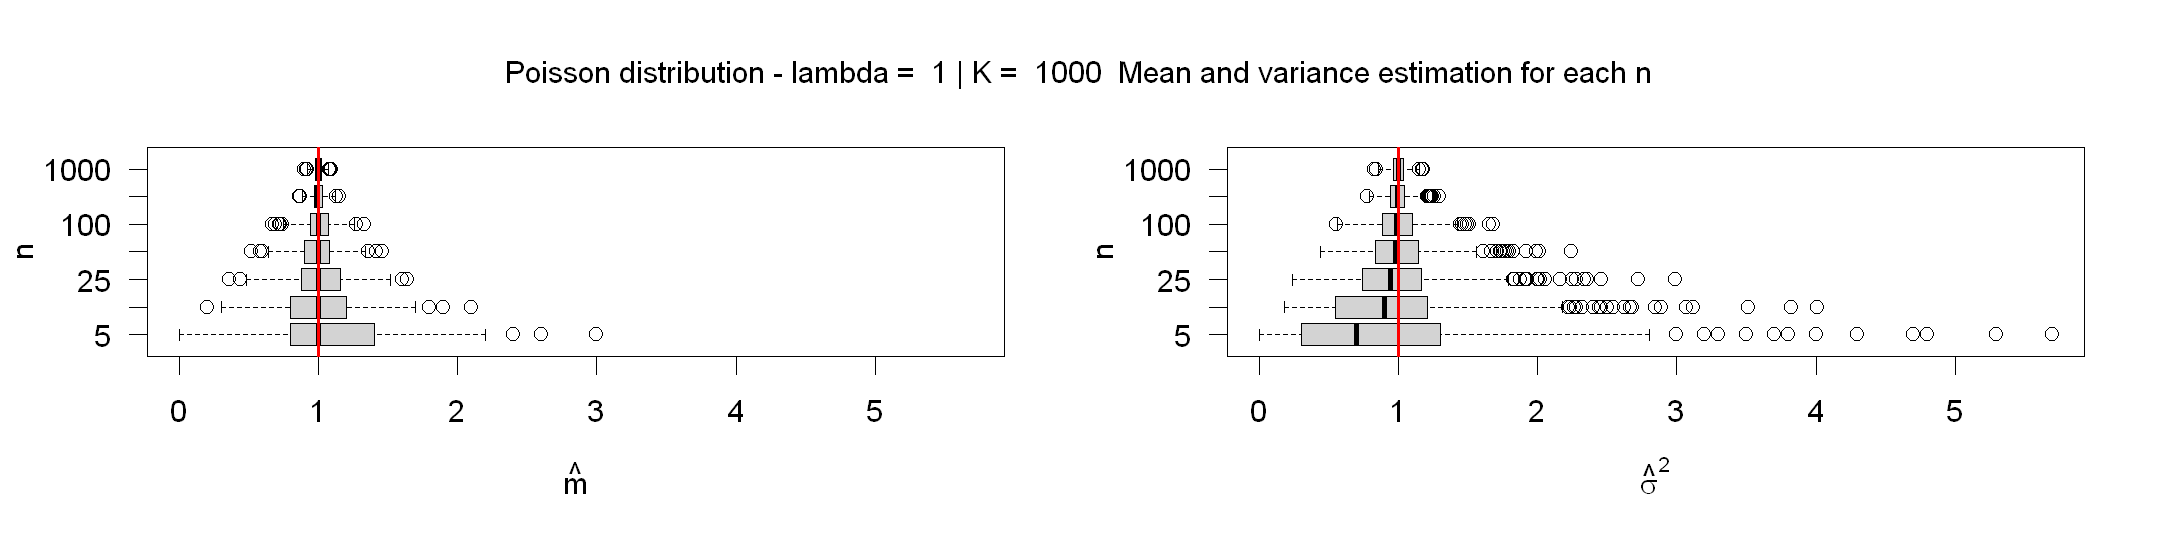

In [99]:
y.min <- min(c(m,sigma2))
y.max <- max(c(m,sigma2))

par(mfrow=c(1,2))

boxplot(m~rep(N,each=K),
        ylim=c(y.min,y.max),
        xlab=expression(paste(hat(m))),
        ylab='n',
        horizontal=TRUE,
        las=1)
abline(v=lambda,col="red",lwd=2)

boxplot(sigma2~rep(N,each=K),
        ylim=c(y.min,y.max),
        xlab=expression(paste(hat(sigma)^2)),
        ylab='n',
        horizontal=TRUE,
        las=1)
abline(v=lambda,col="red",lwd=2)

mtext(paste("Poisson distribution - lambda = ", lambda, "| K = ",K, " Mean and variance estimation for each n"), side = 3, line = -2.5, outer = TRUE)

***
## Point estimation
> ### Estimation of parameter $a$ from a distribution $U_{[0,a]}$
> - Empirical distribution of **Method of moment estimator** : $\hat a_1 = 2\hat m$

In [100]:
emp.distrib.a1hat <- function(a,n) { 
    return (2*apply(matrix(runif(n*1000,min=0,max=a),ncol=n),MARGIN=1,FUN=mean))
}

> - Denstity of the **maximum likelihood estimator** : $\hat a_2 = \max\limits_{i}(X_i)$

In [101]:
dens.a2hat <- function(y,a,n) {
    ymin <- 1e-10 
    y[y<=0] <- ymin 
    y[y>a] <- ymin 
    return(n*y^(n-1)/(a^n))
}

> - Denstity of the **Minimum-variance unbiased estimator** $\hat a_3 = \frac{n+1}{n}\hat a_2$ : 

In [102]:
dens.a3hat <- function(y,a,n) {
    return(n*dens.a2hat(n*y/(n+1),a,n)/(n+1))
}

> - Parameters $a=5$.

In [103]:
a <- 5

> - Function plotting **density** or **distribution** of all estimators on one graph.

In [104]:
all.plots <- function(n){
    
    h.simul <- hist(emp.distrib.a1hat(a,n),plot=FALSE)
    x.lim <- c(0,10)
    y.lim <- c(0,max(c(n/a,sqrt((3*n)/(2*pi))/a,n^2/((n+1)*a),max(h.simul$density))))

    hist(emp.distrib.a1hat(a,n),freq=FALSE,main="",xlim=x.lim*1.05,ylim=y.lim*1.05,col=col[1],axes=TRUE,xlab = "y",ylab=expression(f[Y](y)))

    curve(dnorm(x,mean=a,sd=a/sqrt(3*n)),from=x.lim[1], to=x.lim[2],type="l",col=col[2],lwd=2,add=TRUE)

    curve(dens.a2hat(x,a=a,n=n),from=0,to=a,n=1000,type="l",col=col[3],lwd=2,add=TRUE)

    curve(n*dens.a2hat(n*x/(n+1),a=a,n=n)/(n+1),from=0,to=(n+1)*a/n,n=1000,type="l",col=col[4],lwd=2,add=TRUE)

    abline(v=c(a,(n+1)*a/n),lty=2,col=col[2:3]) 

    abline(h=0,lty=3)

    legend(x.lim[1]-0.5,y.lim[2]*1.1,
           legend=c(expression(paste("Empirical distribution of ",hat(a)[1])),
                    expression(paste("Distribution N(a, a^2/(3*n))")),
                    expression(paste("Density of ",hat(a)[2])),
                    expression(paste("Density of ",hat(a)[3]))),pch=20,col=col,pt.cex=1,cex=1,bty="n")

    title(paste(" n = ",n))
}

> - Plotting for different n to observe the **convergence** of the estimators.

In [105]:
options(repr.plot.width=14, repr.plot.height=10, repr.plot.res = 180)

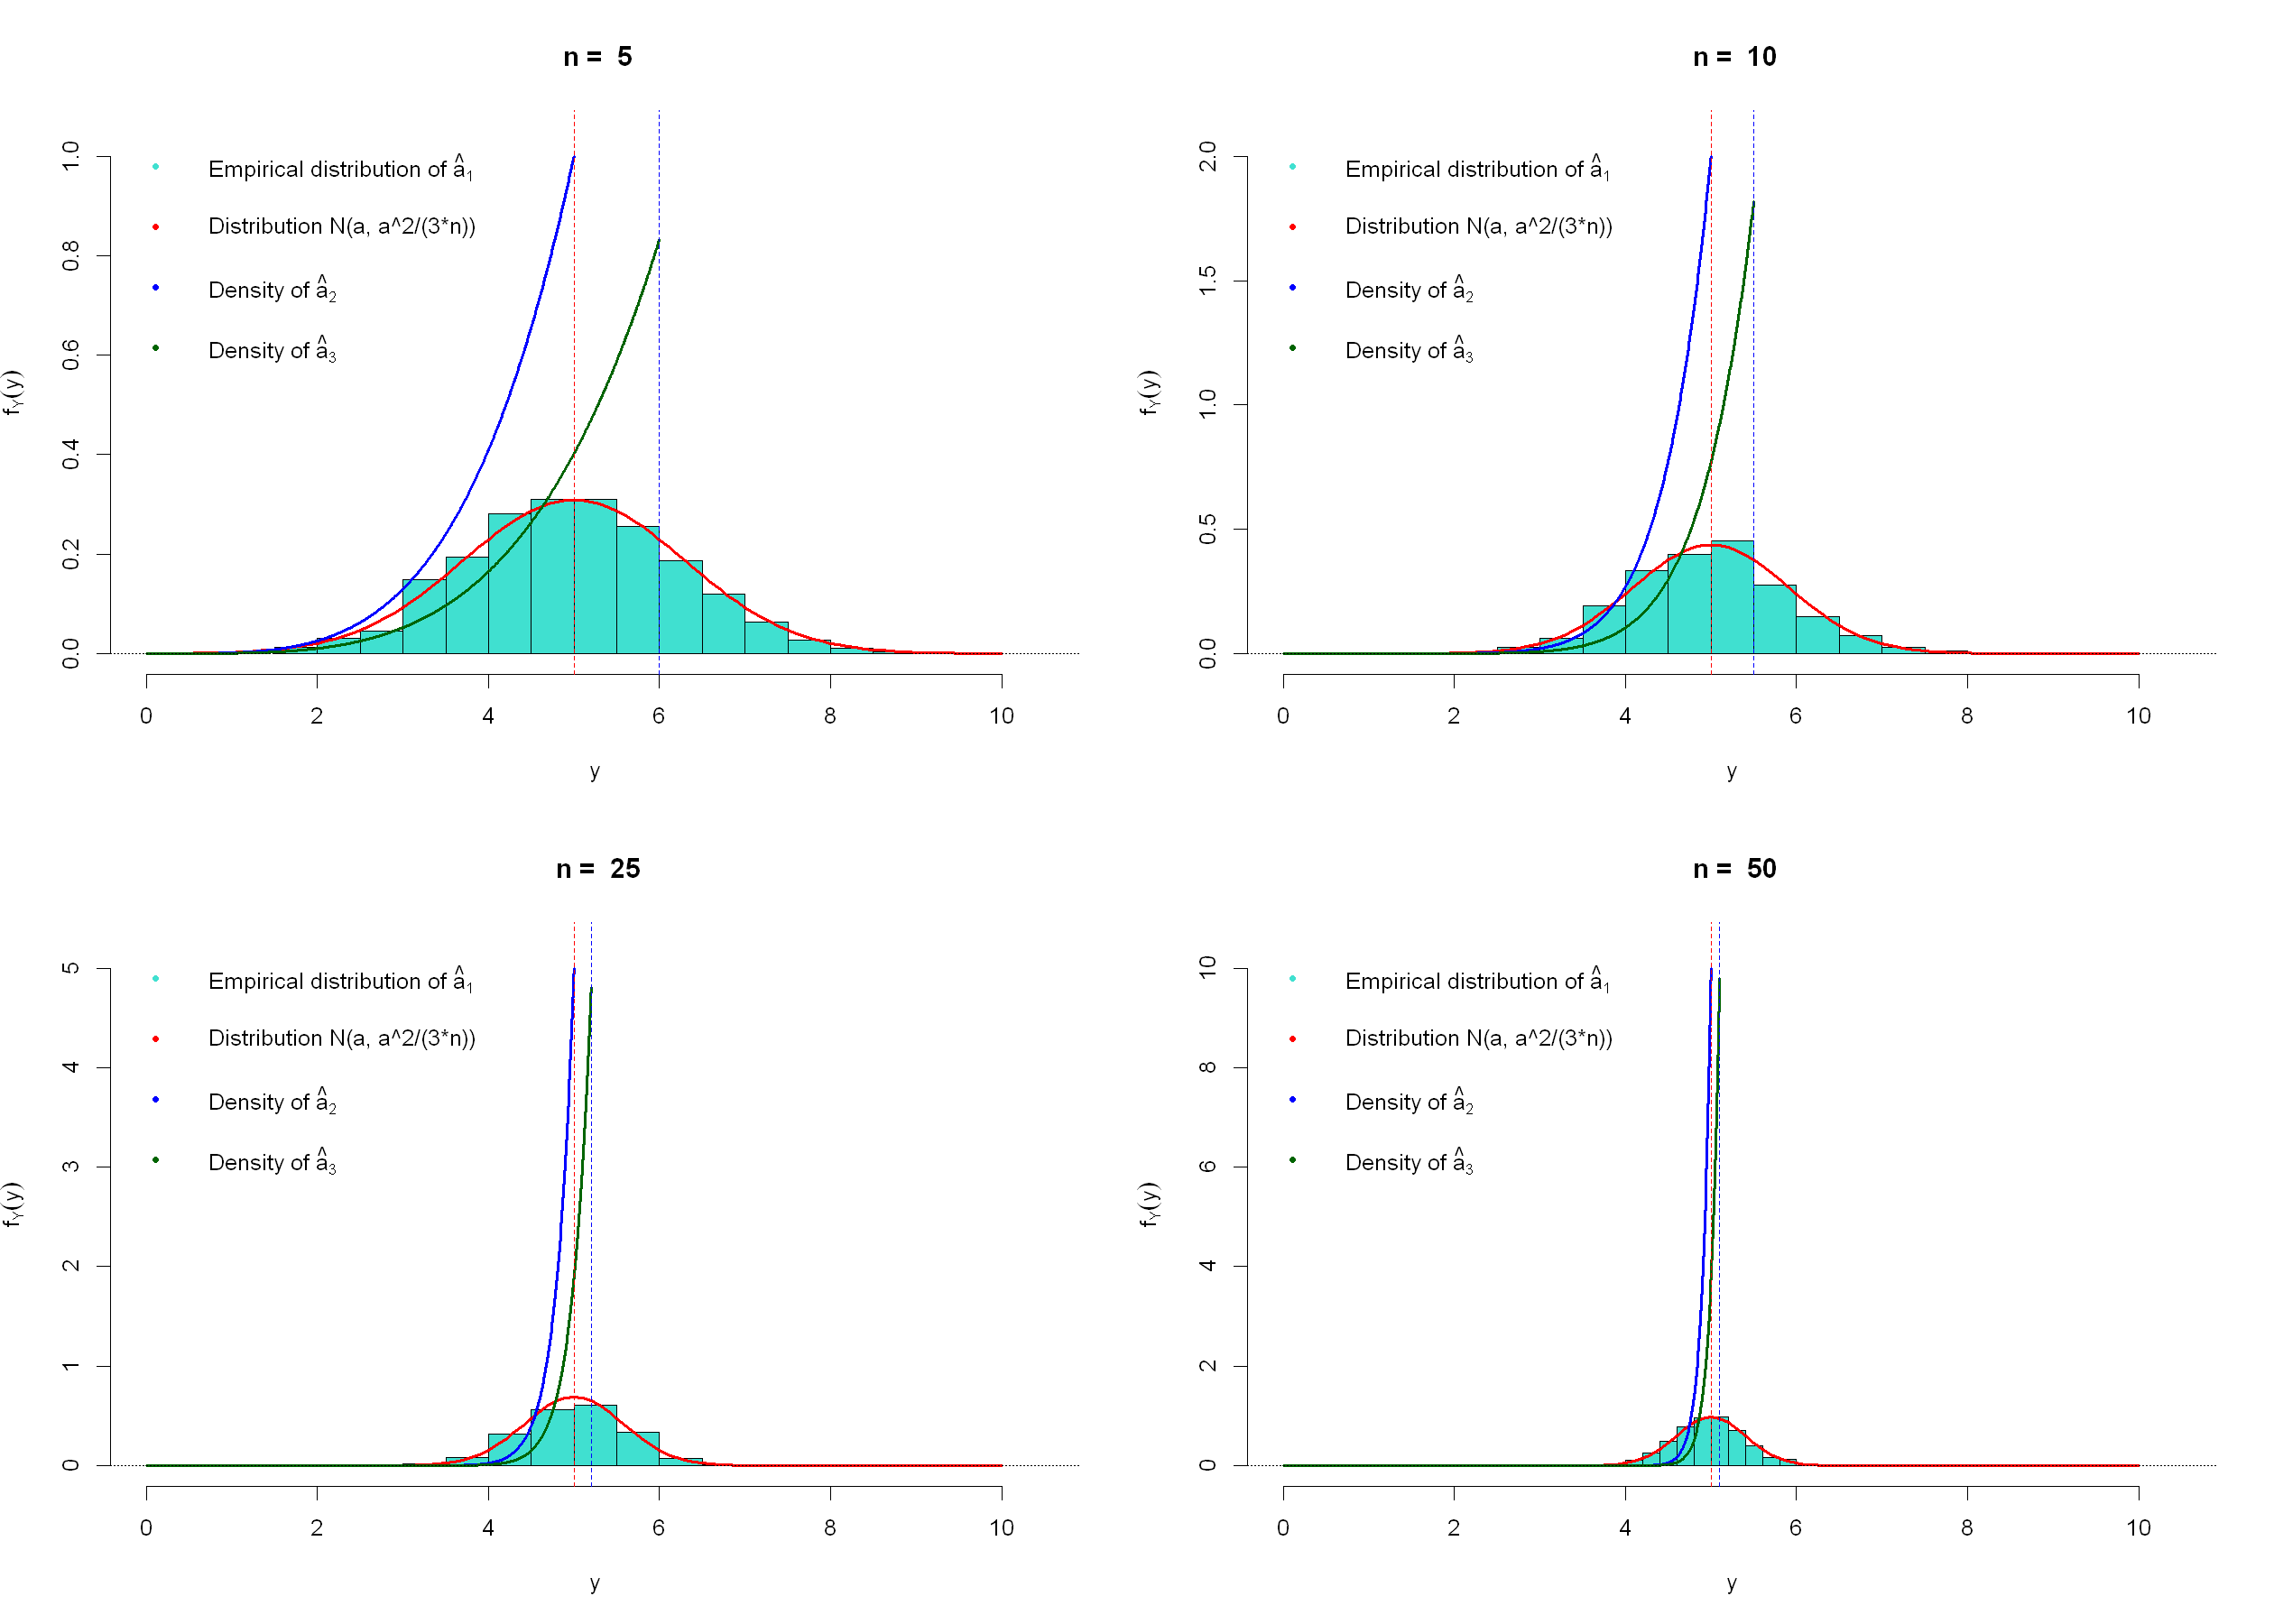

In [106]:
col <- c("turquoise","red","blue","darkgreen") 

par(mfrow=c(2,2))

seq.n <- c(5, 10, 25, 50)
for(n in seq.n) {all.plots(n)}

> - Box-plotting for different n to observe the **convergence** of the estimators.

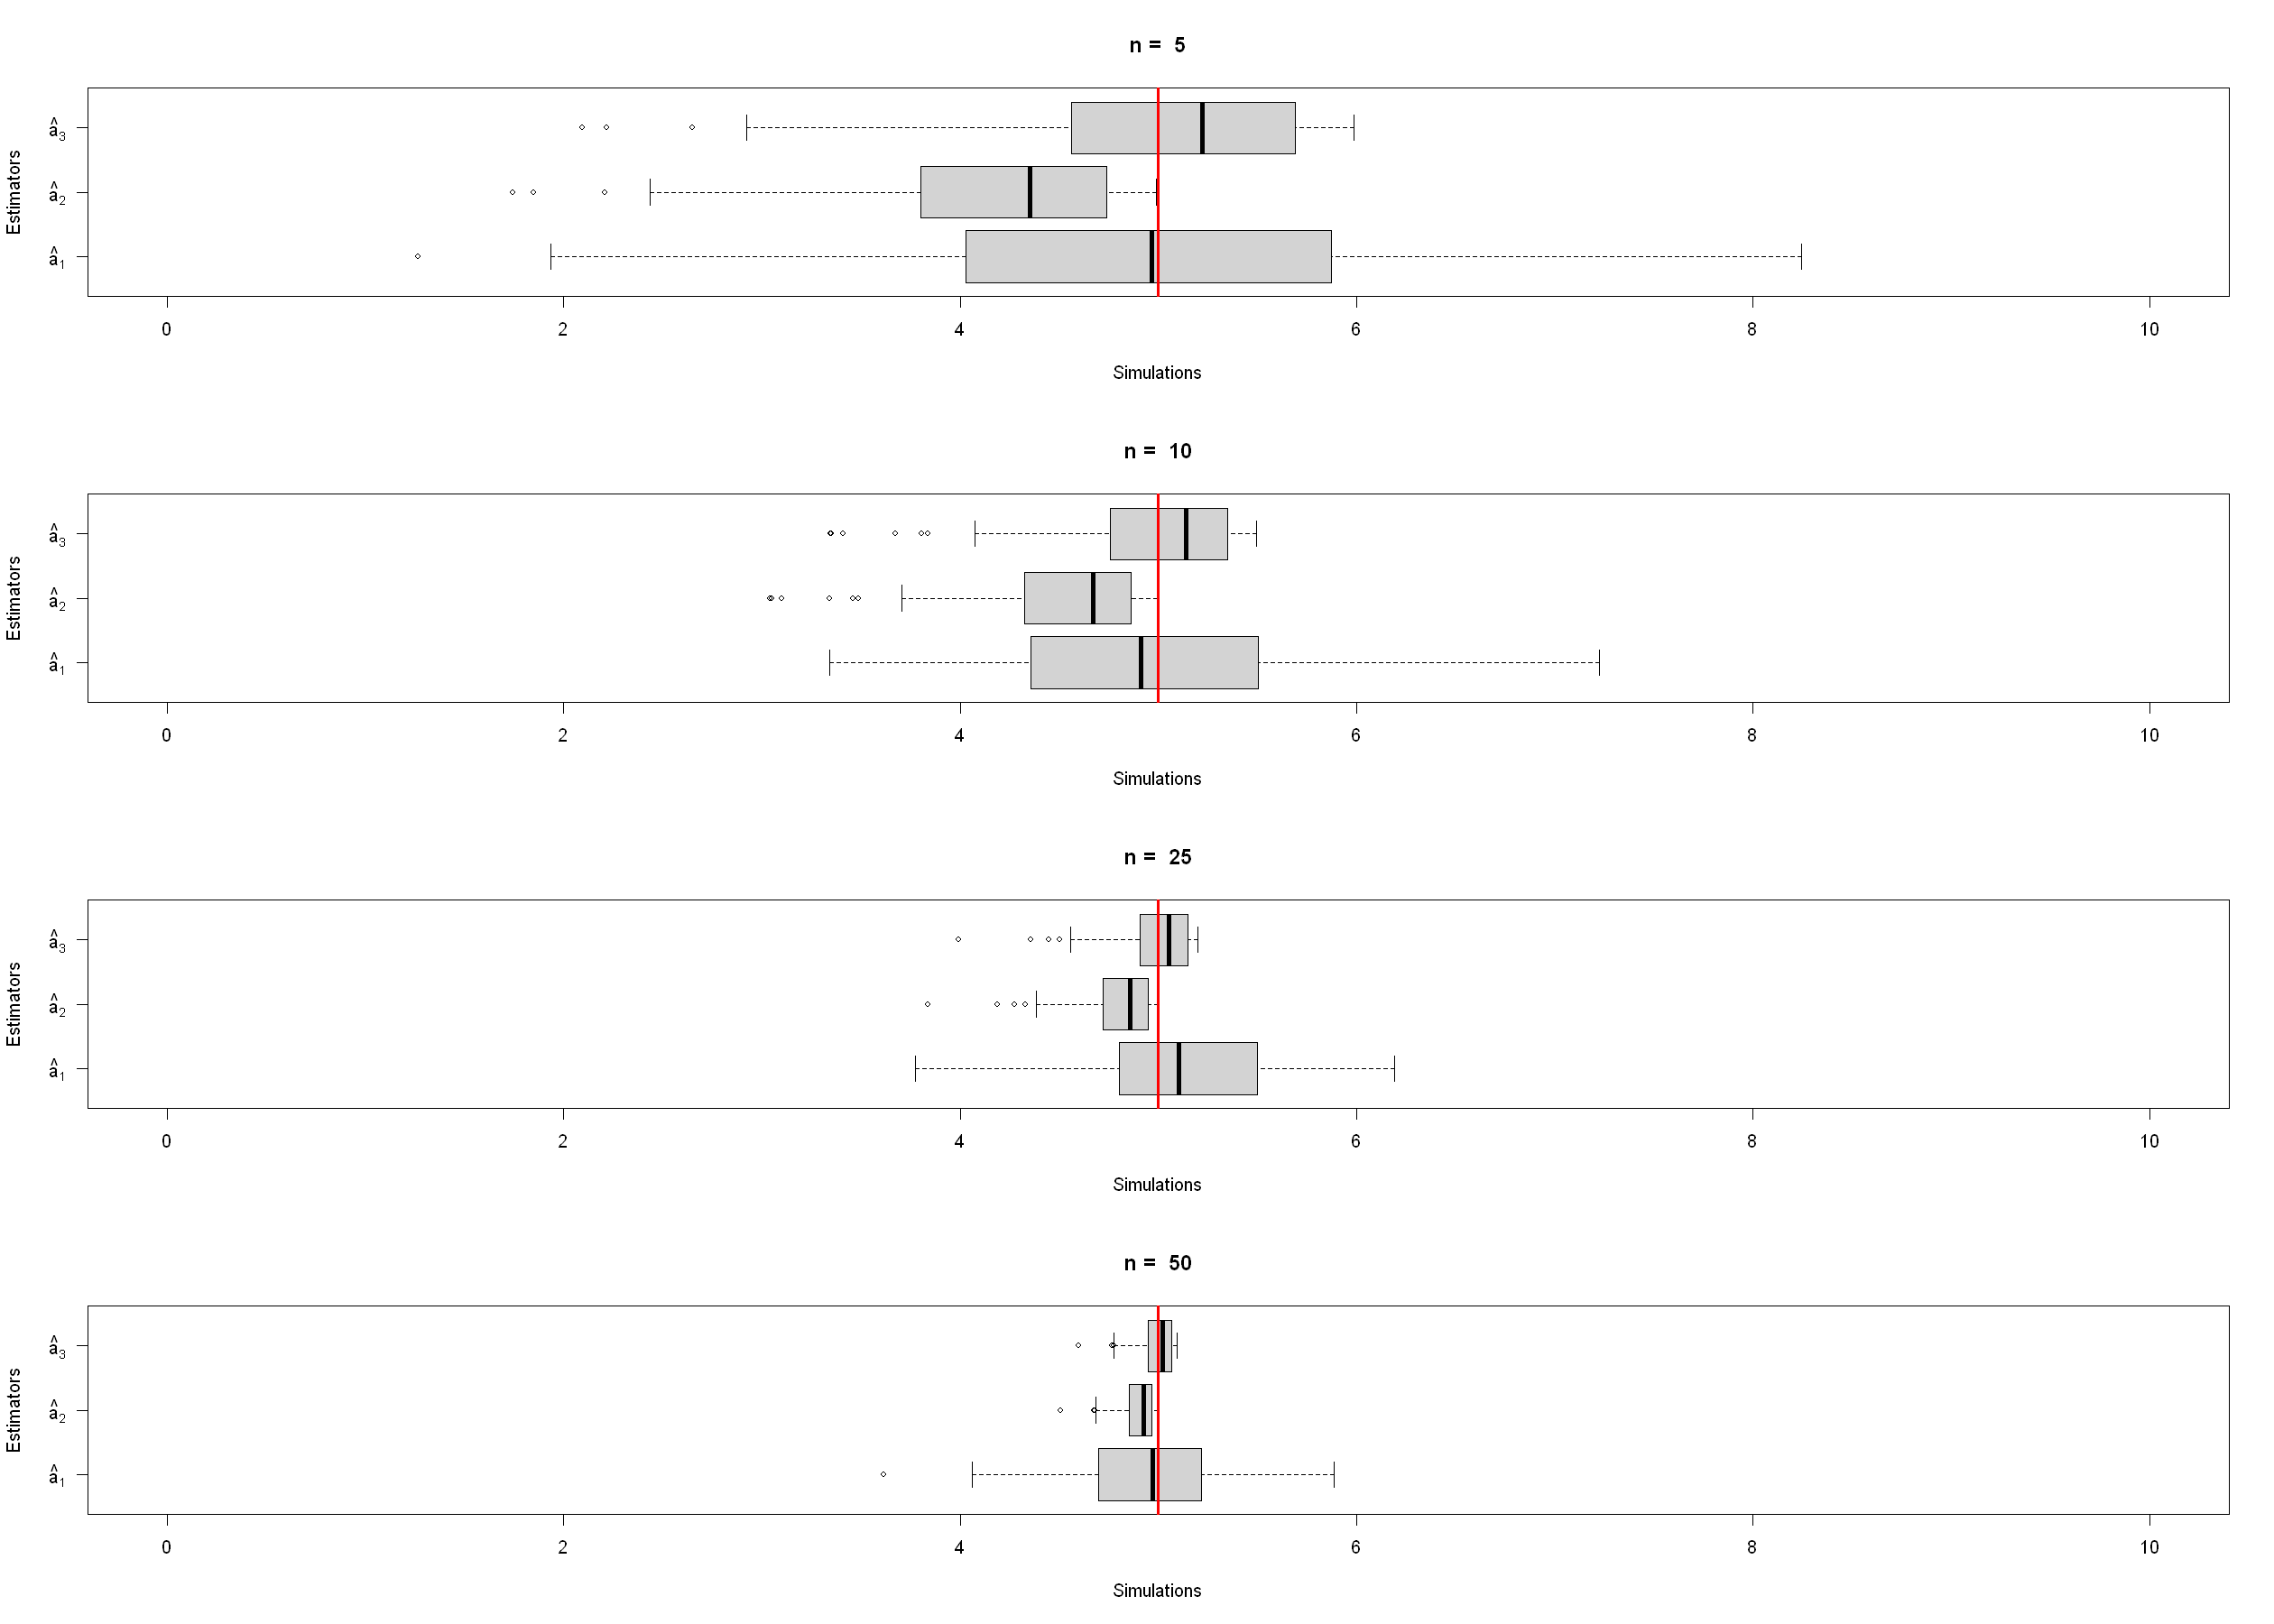

In [107]:
K <- 100
par(mfrow=c(4,1))

for (n in seq.n) {
    h.simul <- hist(emp.distrib.a1hat(a,n),plot=FALSE)
    x.lim <- c(0,10)
    y.lim <- c(0,max(c(n/a,sqrt((3*n)/(2*pi))/a,n^2/((n+1)*a),max(h.simul$density))))
    sample <- matrix(runif(n*K,min=0,max=a),ncol=n)
    a1hat <- 2*rowMeans(sample)
    a2hat <- apply(sample,MARGIN=1,FUN=max)
    a3hat <- (n+1)*a2hat/n
    simul <- c(a1hat,a2hat,a3hat)
    boxplot(simul~rep(1:3,each=K),
            xlab="Simulations",
            ylab="Estimators",
            ylim=x.lim,
            horizontal=TRUE, 
            main=paste("n = ",n),
            names=c(expression(hat(a)[1]),expression(hat(a)[2]),expression(hat(a)[3])),
            las=1)
abline(v=a,col="red",lwd=2)
}

> - Computing the **MSE** of each estimator depending on $n$.

In [108]:
N <- 2:40 
MSE1 <- (a^2)/(3*N)
MSE2 <- (((N*a)/(N+1)-a)^2)+ (N*a^2)/((N+2)*(N+1)^2)
MSE3 <- (a^2)/((N+2)*N)

> - Plotting the **MSE** of each estimator depending on $n$.

In [109]:
options(repr.plot.width=7, repr.plot.height=5, repr.plot.res = 160)

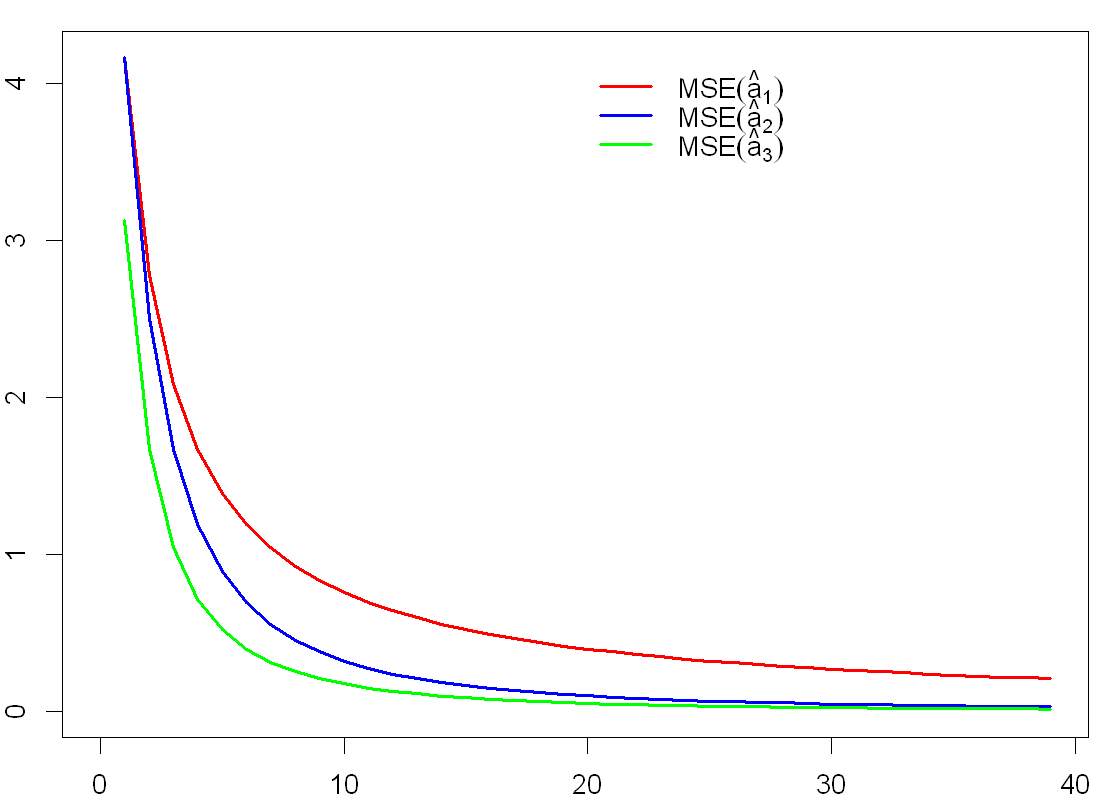

In [110]:
par(mar=c(2,2,1,1))
col <- c("red","blue","green")
y.lim <- max(c(MSE1,MSE2,MSE3))

plot(0,0,"n",
     xlim=c(0,length(N)),
     ylim=c(0,y.lim),
     xlab="N",
     ylab="Estimators value")

points(1:length(N),MSE1,type="l",col=col[1],lwd=2)
points(1:length(N),MSE2,type="l", col=col[2],lwd=2)
points(1:length(N),MSE3,type="l", col=col[3],lwd=2)

legend(length(N)/2,
       y.lim,
       lty=1,
       lwd=2,
       legend=c(expression(MSE(hat(a)[1])),
                expression(MSE(hat(a)[2])),
                expression(MSE(hat(a)[3]))),
       bty="n",
       col=col)

***
## Central limit theorem
> **$Theorem:$** If $X_1,X_2,...,X_n$ are random samples drawn from a population of mean $\mu$ and variance $\sigma^2$ with $\bar X_n$ being the sample mean then $E[\sum_{i=1}^{n}X_i]=nm$ and $V[\sum_{i=1}^{n}X_i]=n\sigma^2$ and the sequence $U_n = \frac{\hat m - m}{\sigma /\sqrt{n}}$ converge in distribution towards $N(0,1)$.
> ***
> ### CLT and Binomial distribution
> - Parameters $p = 0.7$.

In [111]:
p <- 0.7

> - Function plotting the **density** of $B(n,p)$ and $N(np,np(1-p))$ on one graph.

In [112]:
binomial.sample.plot <- function(n){
    
    # Parameters
    m.bino <- n*p
    sigma2.bino <- n*p*(1-p)
    
    # Bounds
    x.inf <- floor(m.bino - 6*sqrt(sigma2.bino))
    x.sup <- floor(m.bino + 6*sqrt(sigma2.bino))
    x.bino <- x.inf:x.sup
    x.norm <- seq(from=x.inf,to=x.sup,length=1000)
    
    # Distributions
    bino.dist <- dbinom(x=x.bino,size=n,prob=p)
    norm.dist <- dnorm(x=x.norm,mean=m.bino,sd=sqrt(sigma2.bino))
    ylim <- c(0,max(bino.dist,norm.dist)*1.1)
    
    # PLots
    plot(x.bino,bino.dist,ylim=ylim,type="h",col="blue",lwd=2,main=paste("n = ",n),ylab="",xlab="")
    lines(x.norm,norm.dist,type="l",col="red",lwd=2,xaxt="n")
    axis(side=1, at=x.bino, labels=x.bino)   
}

> - The **Normal approximation** improves as **n increases**

In [113]:
options(repr.plot.width=14, repr.plot.height=8, repr.plot.res = 180)

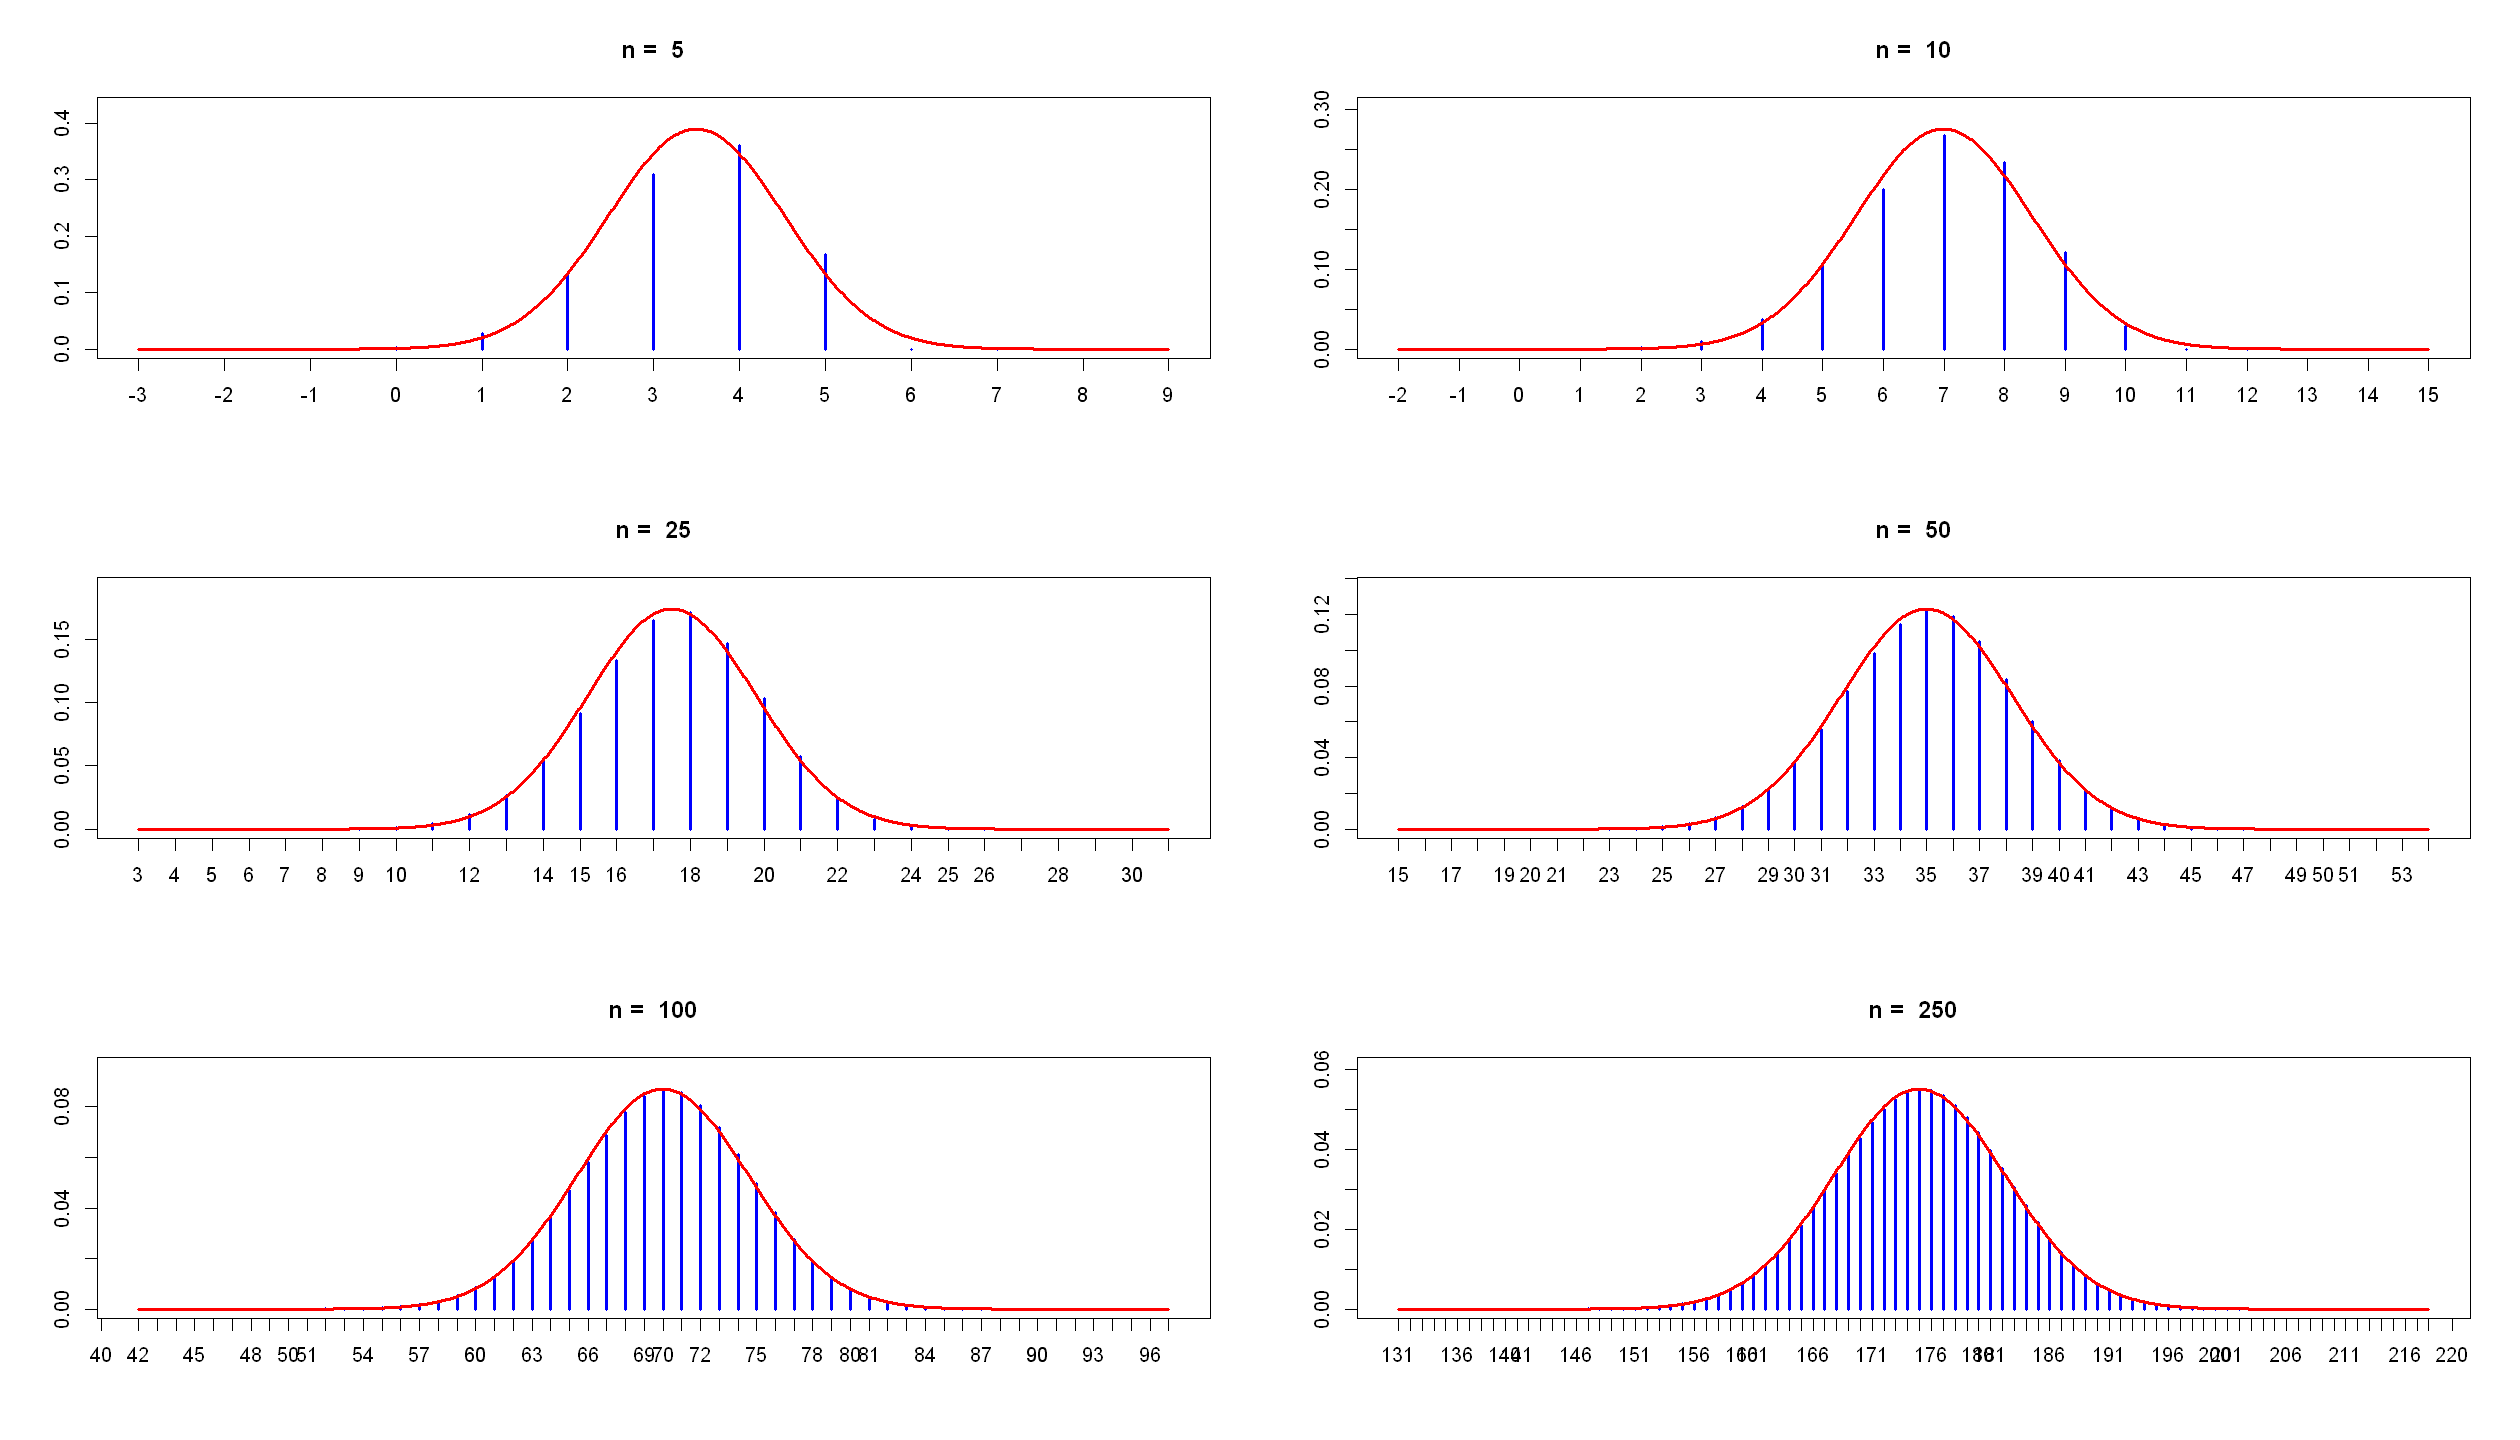

In [114]:
par(mfrow=c(3,2))

for (n in c(5,10,25,50,100,250)) { 
    binomial.sample.plot(n)
}

> - The **Basic Normal approximation** (in red aove) can be improved using the Yates continuity correction.
> - Function ploting the value of the cumulative density function for a given quantile $q$ e.g. $P(X\leq q)$.
>    - Plot for each $B(n,p)$ and $N(np,np(1-p))$ distribution as well as the Normal Approximation with the continuity correction of **Yates** with $P(X\leq q+1/2)$.

In [115]:
p.approx <- function(n,p){
    
    q <- floor(n*p + sqrt(n*p*(1-p)))
    
    # Binomial computation of p
    p.bino <- pbinom(q,n,p)
    
    # Normal approximation of Binomial Distribution
    p.norm <- pnorm(q,n*p,sqrt(n*p*(1-p))) 
    
    # Yates continuity correction
    p.norm.yates <- pnorm(q+0.5,n*p,sqrt(n*p*(1-p)))
    
    # plots
    barplot(c(p.bino,p.norm,p.norm.yates),main=paste("n = ",n, " p = ", p),ylim=c(0,1),names=c('Binom','Norm','Yates'))
    abline(h=p.bino,col="red",lwd=2)
}

> - The **Normal approximation** improves as **n increases** and is also more accurate when $p$ is **far from 0 or 1**.

In [116]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 180)

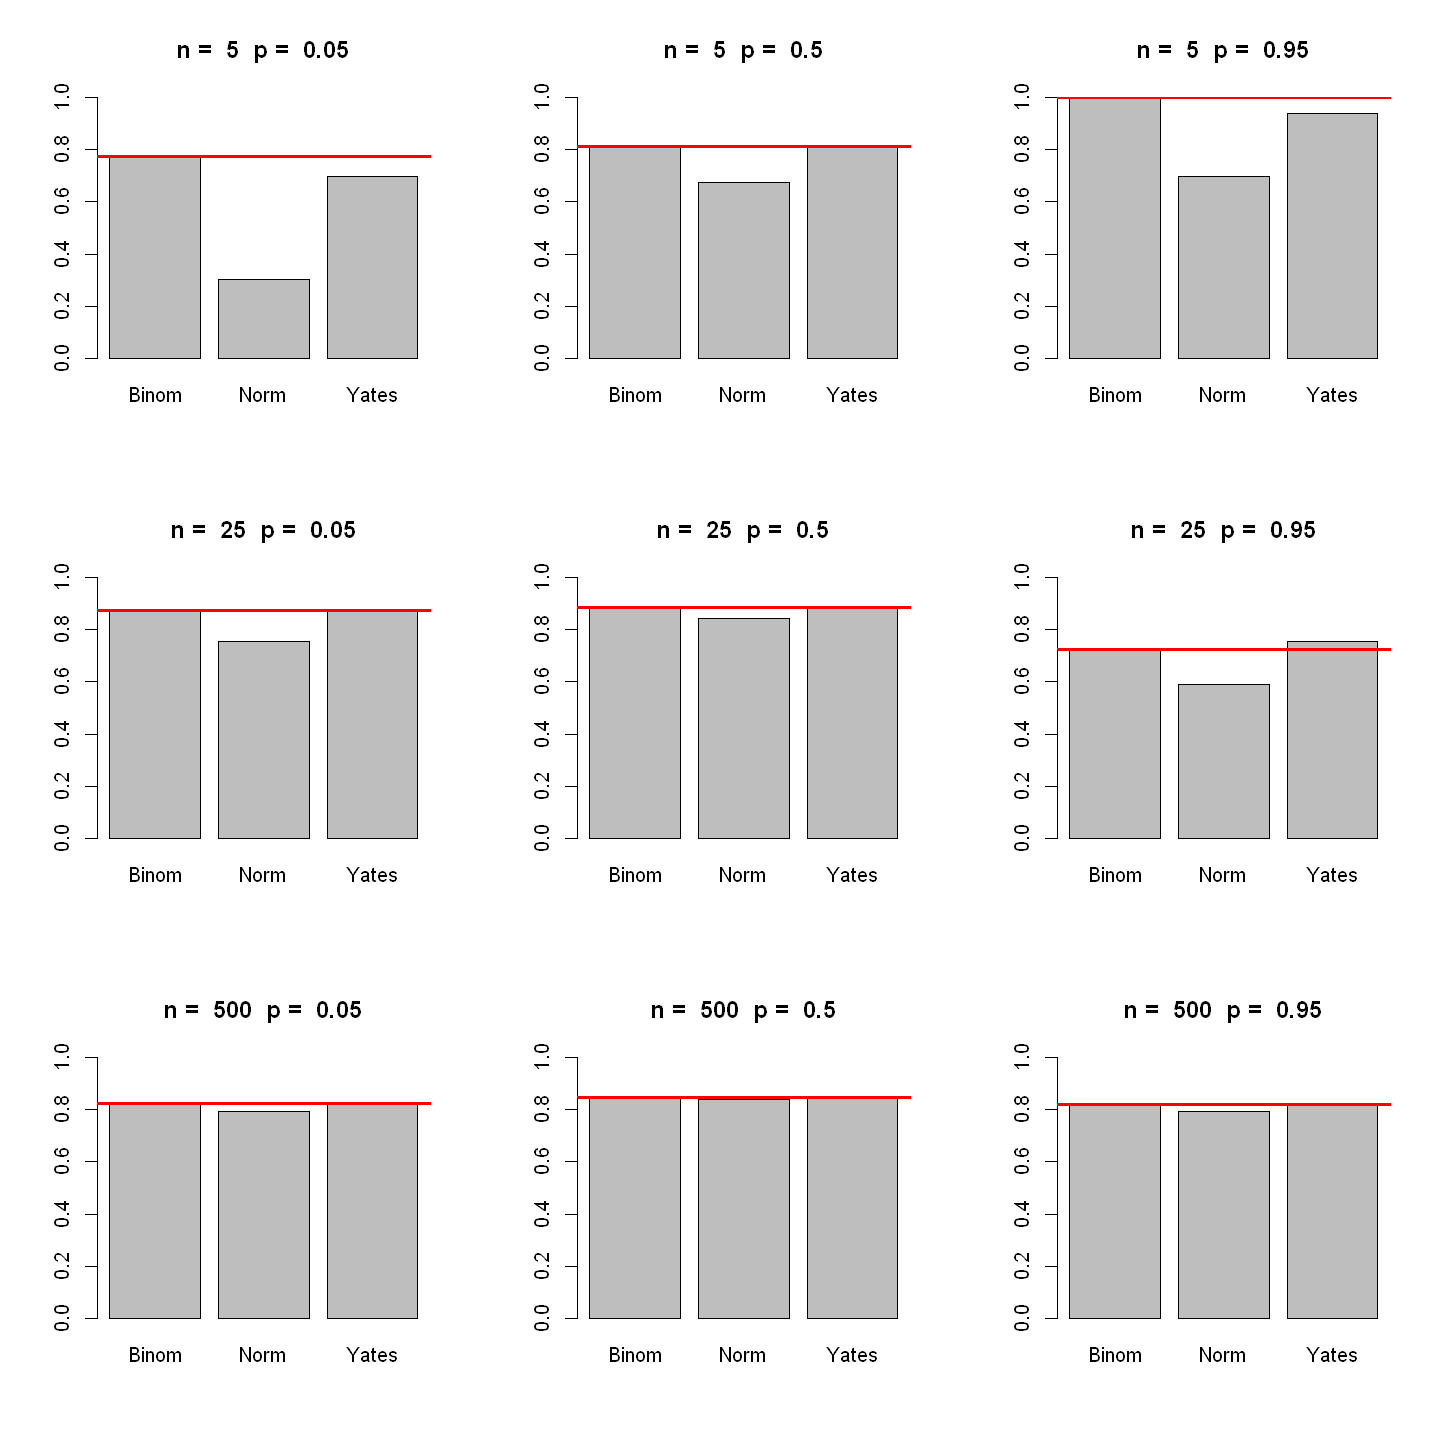

In [117]:
par(mfrow=c(3,3))

for (n in c(5,25,500)) {
    for (p in c(0.05,0.5,0.95)){p.approx(n,p)}
}

***
## Confidence Interval
> ### $B(n,p)$ distribution
> ***
> #### Analysis of different confidence interval calculations.
> - Confidence interval parameters.

In [118]:
accuracy.res <- 5
n <- 20
p.conf <- 0.95
p <- 0.2

> - Computation of confidence intervals on $p$ under **Normal** approximation.

In [119]:
IC.Bino <- function(p,n,p.est,niv.conf) {
    u <- qnorm(1 - (1-niv.conf)/2, mean = 0, sd = 1)
    return(abs(p.est-p) - u*sqrt((p*(1-p))/n))
}

IC.Bino2 <- function(p,n,p.est,niv.conf) {
    u <- qnorm(1 - (1-niv.conf)/2, mean = 0, sd = 1)
    return(abs(p.est-p) - 0.5/n - u*sqrt((p*(1-p))/n))
}

> - Computation of the $p$ estimator.

In [120]:
x0 <- rbinom(1,n,p)
p.hat <- x0/n 

> - Computation of assymptotic interval bounds.

In [121]:
p.min.asympt <- uniroot(IC.Bino,n=n,p.est=p.hat, niv.conf=p.conf,interval=c(0,p.hat))$root
p.max.asympt <- uniroot(IC.Bino,n=n,p.est=p.hat, niv.conf=p.conf,interval=c(p.hat,1))$root

> - Computation of assymptotic interval bounds with continuity correction.

In [122]:
p.min.asympt.cont.corr <- uniroot(IC.Bino2,n=n,p.est=p.hat, niv.conf=p.conf,interval=c(0,p.hat))$root
p.max.asympt.cont.corr <- uniroot(IC.Bino2,n=n,p.est=p.hat, niv.conf=p.conf,interval=c(p.hat,1))$root

> - Computation of the quantil  $u_{1-\alpha/2}$.

In [123]:
u <- qnorm(1 - (1-p.conf)/2)

> - Computation of the Wald interval bounds by proportion approximation.

In [124]:
p.min.approx <- p.hat - u*sqrt(p.hat*(1-p.hat)/n) 
p.max.approx <- p.hat + u*sqrt(p.hat*(1-p.hat)/n)

> - Printing the different intervals for comparison.

In [125]:
cat("\nAssymptotic interval formula without continuity correction at level", p.conf,":     [",round(c(p.min.asympt,p.max.asympt),digits=accuracy.res),"]")
cat("\nAssymptotic interval formula with continuity correction at level", p.conf,":        [",round(c(p.min.asympt.cont.corr,p.max.asympt.cont.corr),digits=accuracy.res),"]")
cat("\nInterval from function binom.test without normal approximation at level", p.conf,": [",round(binom.test(x0,n,conf.level=p.conf)$conf,digits=accuracy.res),"]")
cat("\nInterval from function prop.test at level", p.conf,":\t\t\t       [",round(prop.test(x0,n,conf.level=p.conf,correct=FALSE)$conf,digits=accuracy.res),"]")
cat("\nInterval from function prop.test with continuity correction at level", p.conf,":    [",round(prop.test(x0,n,conf.level=p.conf,correct=TRUE)$conf,digits=accuracy.res),"]")
cat("\nWald interval proportion approximation at level", p.conf,":\t\t\t       [",round(c(p.min.approx,p.max.approx),digits=accuracy.res),"]")


Assymptotic interval formula without continuity correction at level 0.95 :     [ 0.05237 0.36042 ]
Assymptotic interval formula with continuity correction at level 0.95 :        [ 0.03957 0.38862 ]
Interval from function binom.test without normal approximation at level 0.95 : [ 0.03207 0.37893 ]
Interval from function prop.test at level 0.95 :			       [ 0.05237 0.36042 ]
Interval from function prop.test with continuity correction at level 0.95 :    [ 0.03957 0.38863 ]
Wald interval proportion approximation at level 0.95 :			       [ -0.00649 0.30649 ]

> ***
> #### Interval under gaussian approximation
> - Graphical representation of intervals computed using the **prop.test()** function.

In [126]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 150)

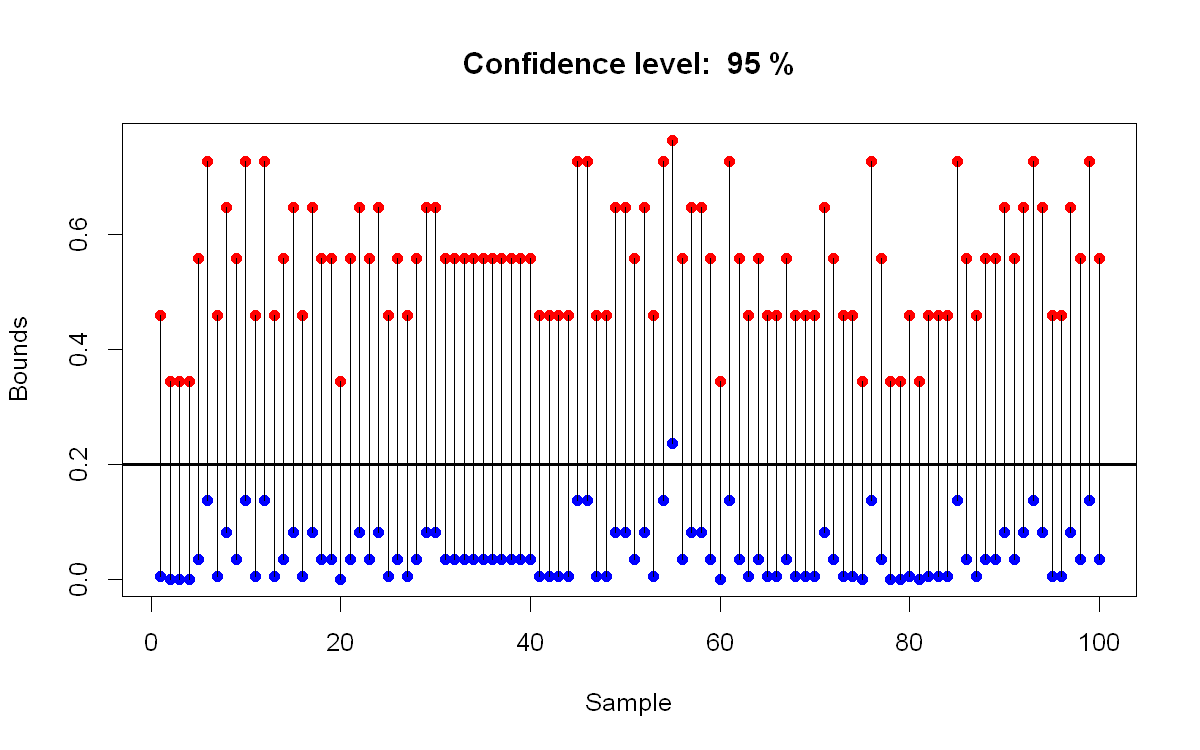

In [127]:
K <- 100
n <- 10
X <- rbinom(K,n,p)

bounds <- NULL
for (k in 1:K) { bounds <- rbind(bounds,prop.test(X[k],n,conf.level=p.conf)$conf) }

ymin <- min(bounds)
ymax <- max(bounds)

plot(1:K,bounds[,1],pch=19,col="blue",ylim=c(ymin,ymax),xlab="Sample",ylab="Bounds")
points(1:K,bounds[,2],pch=19,col="red")
segments(1:K,bounds[,1],1:K,bounds[,2])
title(paste("Confidence level: ",100*p.conf,"%"))
abline(h=p,lwd=2)

> ***
> #### Accuracy Analysis 
> - Analysis of the sample size needed for diffrent accuracy measured $(p - \hat p)$ of different confidence intervals on $p$
> - Parameters.

In [128]:
p<-seq(0.01,0.5,by=0.01)
p.conf<-0.95
accuracy.inter1<-0.01
accuracy.inter2<-0.02
accuracy.inter3<-0.03
accuracy.inter4<-0.04
p.conf.bil<-1-(1-p.conf)/2
u<-qnorm(p.conf.bil)
N1<-NULL                
N2<-NULL
N3<-NULL
N4<-NULL

> - Computation of the required sample size $n$ for each probability for each required accuracy.

In [129]:
for (k in 1:length(p)) {
    N1<-c(N1,u^2*p[k]*(1-p[k])/(accuracy.inter1^2))
    N2<-c(N2,u^2*p[k]*(1-p[k])/(accuracy.inter2^2))
    N3<-c(N3,u^2*p[k]*(1-p[k])/(accuracy.inter3^2))
    N4<-c(N4,u^2*p[k]*(1-p[k])/(accuracy.inter4^2))
}

> - Plotting the difference.

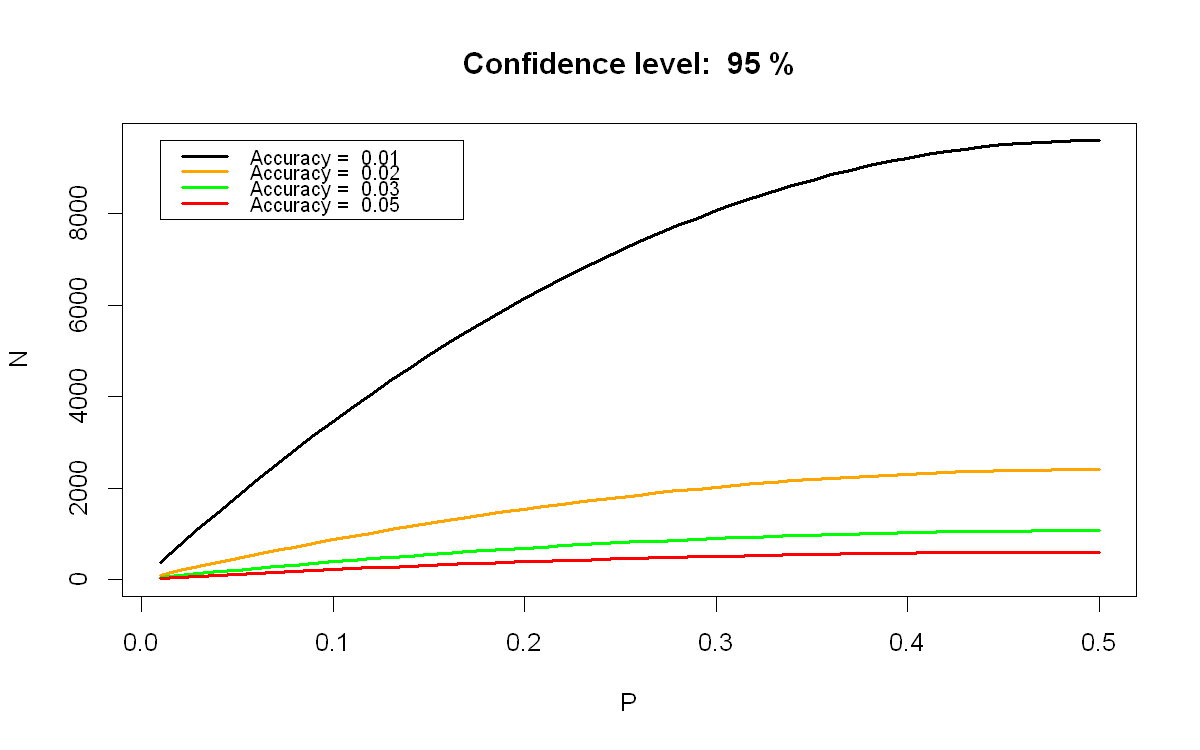

In [130]:
col<-c("black","orange","green","red")
plot(p,floor(N1),type="l",lwd=2,xlab="P",ylab="N",ylim=c(0,max(N1)))
lines(p,floor(N2),type="l",lwd=2,col=col[2])
lines(p,floor(N3),type="l",lwd=2,col=col[3])
lines(p,floor(N4),type="l",lwd=2,col=col[4])
title(paste("Confidence level: ",100*p.conf,"%"))
legend(min(p),max(N1),cex=0.8, lty=1,lwd=2,legend=paste("Accuracy = ",c(0.01,0.02,0.03,0.05)),col=col)

> ***
> ### $N(\mu,\sigma ^2)$ distribution
> - Parameters.

In [131]:
digits <- 5
m <- 2
sigma2 <- 1.5
sigma <- sqrt(sigma2)
p.conf <- 0.9
p.conf.bil <- 1-(1-p.conf)/2

> ***
> #### Cochran's theorem
>- **Exact** interval computation.

In [132]:
l.student <- function(n){
    x <- rnorm(n=n,mean=m,sd=sigma)
    return(c(mean(x) + qt(1 - p.conf.bil,df=n-1) * sqrt(var(x)/n),mean(x) + qt(p.conf.bil,df=n-1) * sqrt(var(x)/n)))
}

> ***
> #### Bootstrapping
> - Interval computation for $K$ samples of size $n$.

In [133]:
L.quantiles <- function(K,n){
    bootstrap <- NULL
    x <- rnorm(n=n,mean=m,sd=sigma)
    for (k in 1:K) {bootstrap <- rbind(bootstrap,sample(x,n,replace=TRUE))}
    return(quantile(apply(bootstrap,MARGIN=1,FUN=mean),probs=c((1-p.conf)/2 , 1-(1-p.conf)/2)))
}

> ***
> #### Comparison Invervals
> - **Comparing** both interval computation for $n=10$ and $K=100$.

In [134]:
cat("For m = ",m,"at confidence level:", p.conf,"and n = ", 10, 
    ":\n\nExact interval on m :      ",round(l.student(10),digits=digits),
    "\nBootstraped interval on m :",round(L.quantiles(100,10),digits=digits))

For m =  2 at confidence level: 0.9 and n =  10 :

Exact interval on m :       1.21746 3.06142 
Bootstraped interval on m : 1.86582 2.50815

> - **Comparing** both interval computation for $n=100$ and $K=100$.

In [135]:
cat("For m = ",m,"at confidence level:", p.conf,"and n = ", 100, 
    ":\n\nExact interval on m :      ",round(l.student(100),digits=digits),
    "\nBootstraped interval on m :",round(L.quantiles(100,100),digits=digits))

For m =  2 at confidence level: 0.9 and n =  100 :

Exact interval on m :       1.82799 2.17827 
Bootstraped interval on m : 2.02671 2.32082

> ***
> #### Comparison Bounds Asymptotic Behavior
> - Plotting the asymptotic behavior of the bounds of an **Exact** interval computation.

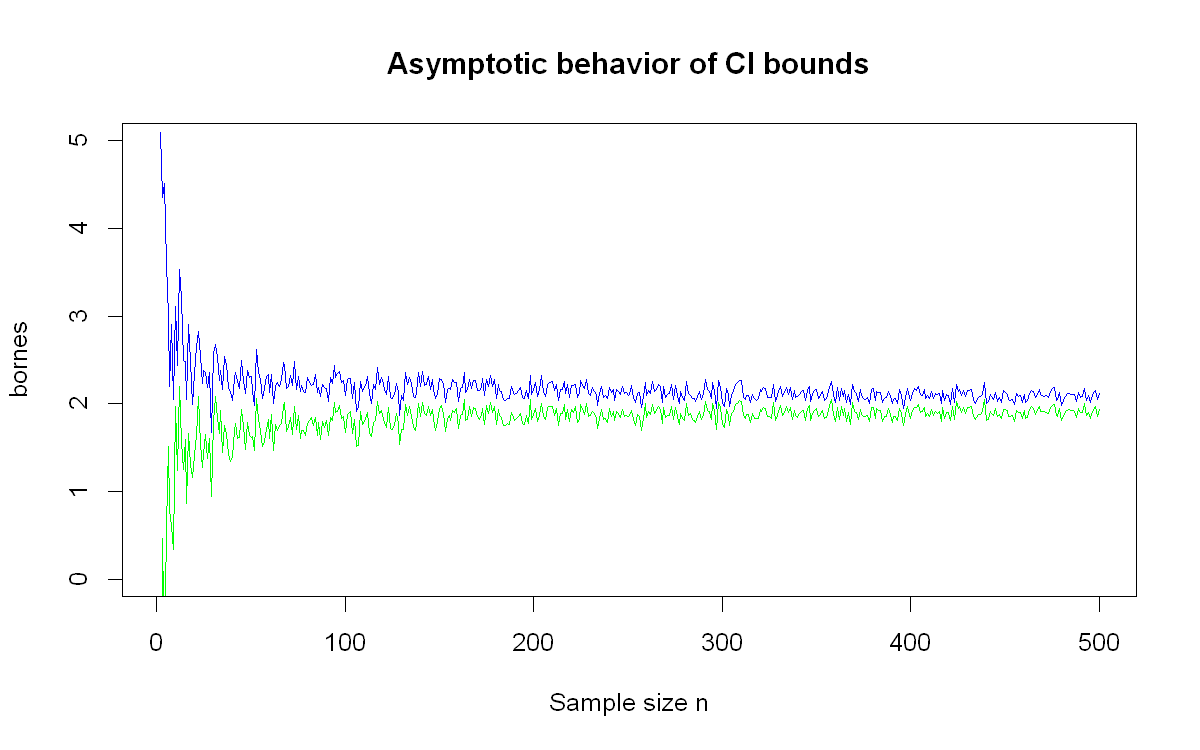

In [136]:
b.exact <- NULL

for (n in 2:500) {
    x <- rnorm(n=n,mean=m,sd=sigma)
    b.exact <- rbind(b.exact, l.student(n))
}

n <- 2:500
plot(n,b.exact[,1], main="Asymptotic behavior of CI bounds",xlab="Sample size n",ylab="bornes",col="green",type='l',ylim=c(0,5))
lines(n,b.exact[,2], col = "blue", type='l')

> - Plotting asymptotic behavior as $K$ increases of Bootstrap CI bounds for $n=10$

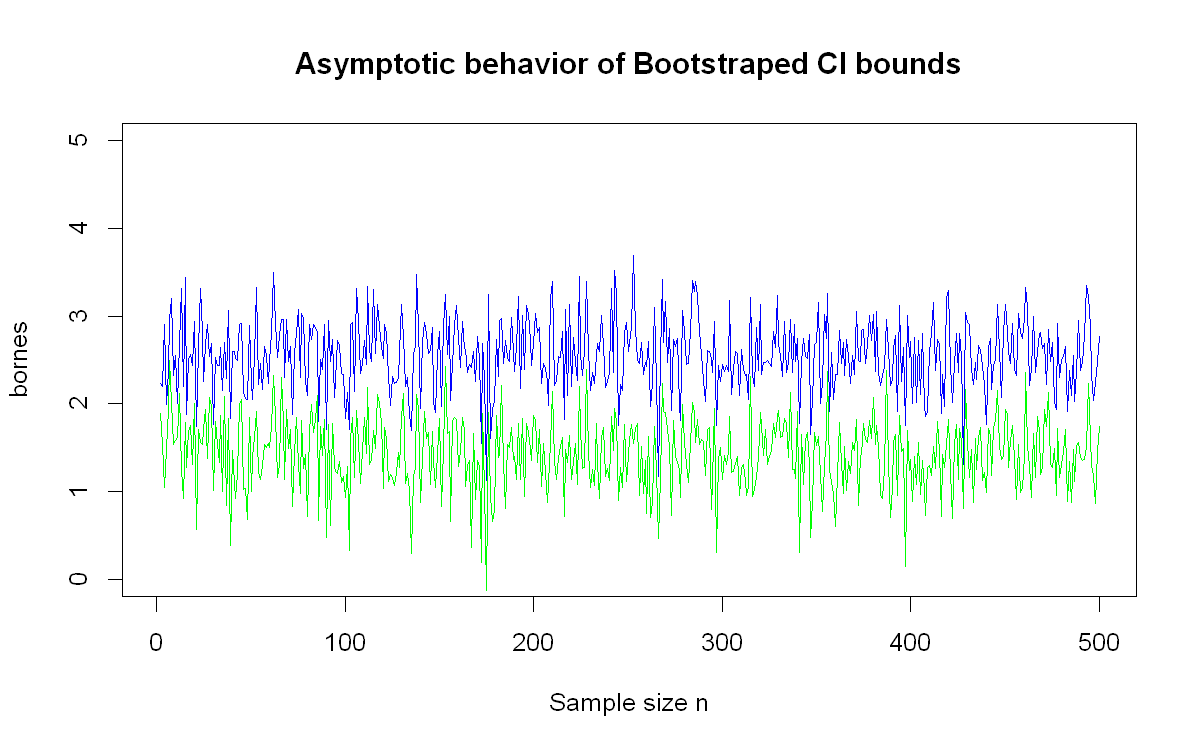

In [137]:
bootstrap.quantiles <- NULL

seq.K <- 2:500
for (K in seq.K){
    bootstrap.quantiles <- rbind(bootstrap.quantiles,L.quantiles(K,10))
}

plot(seq.K,bootstrap.quantiles[,1], main="Asymptotic behavior of Bootstraped CI bounds",xlab="Sample size n",ylab="bornes",col="green",type='l',ylim=c(0,5))
lines(seq.K,bootstrap.quantiles[,2], col = "blue", type='l')

> - Plotting asymptotic behavior of CI Bounds of both exact and bootstrapped intervals.

In [138]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res = 160)

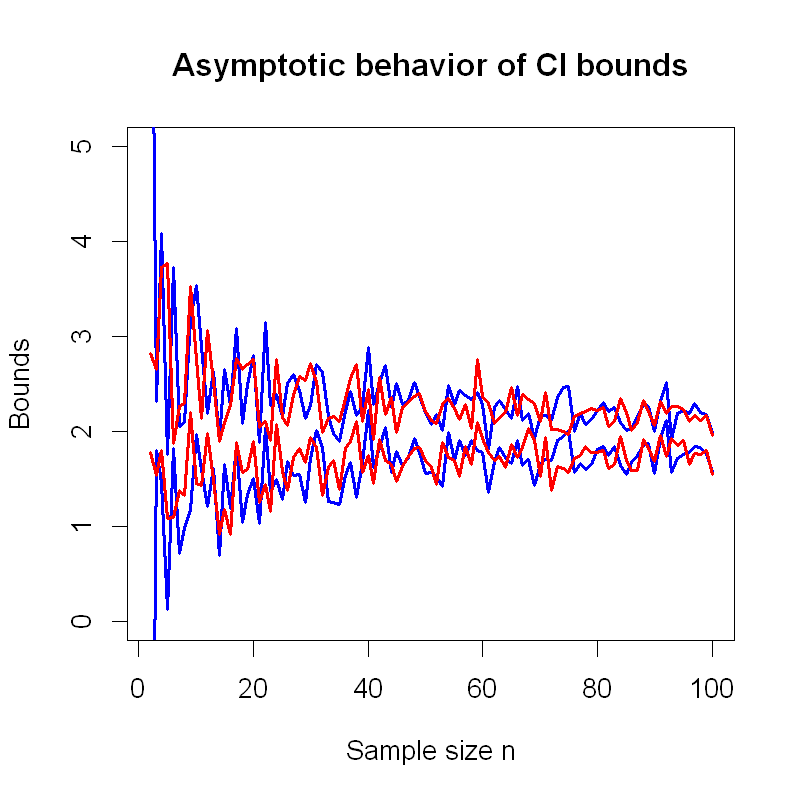

In [139]:
K <- 100
b.exact <- NULL
bootstrap.quantiles <- NULL

for (n in 2:100) {
    x <- rnorm(n=n,mean=m,sd=sigma)
    b.exact <- rbind(b.exact, l.student(n))
    bootstrap.quantiles <- rbind(bootstrap.quantiles,L.quantiles(K,n))
}

n <- 2:100
plot(n,b.exact[,1], main="Asymptotic behavior of CI bounds",xlab="Sample size n",ylab="Bounds",col="blue",type='l',ylim=c(0,5),lwd=2)
lines(n,b.exact[,2],col="blue",type='l',lwd=2)
lines(n,bootstrap.quantiles[,1],col="red",type='l',lwd=2)
lines(n,bootstrap.quantiles[,2],col="red",type='l',lwd=2)

***
## Hypothesis Testing
> The aim here is to use **graphical representation** oh hypothesis testing to understand the effect implied by variations in values of $n$ and $\alpha$.
> - Test parameters on $m$ with $H_0: m = 80$ and $H_1: m = 78$ with $\sigma = 7$.

In [140]:
sigma <- 7
m0 <- 80
m1 <- 78

> - Function coloring both errors of the hypothesis testing depending on $\alpha$ and $n$.

In [141]:
graphical.errors <- function(alpha, n){

    #Computation
    threshold <- m0+(sigma/sqrt(n))*qnorm(alpha, mean = 0, sd = 1)
    beta <- 1-pnorm((sqrt(n)/sigma)*(threshold-m1), mean = 0, sd = 1)

    #Plot Lines
    x.H0 <- seq(m0-3.5*sigma/sqrt(n), m0+3.5*sigma/sqrt(n), length=500)
    x.H1 <- seq(m1-3.5*sigma/sqrt(n), m1+3.5*sigma/sqrt(n), length=500)
    x.H0.H1 <- c(x.H0,x.H1)
    plot(x.H0, dnorm(x.H0,m0,sigma/sqrt(n)), type = "l", main = "", xlim=c(min(x.H0.H1),max(x.H0.H1)) , sub = "", xlab = "", ylab = "")
    lines(x.H1, dnorm(x.H1,m1,sigma/sqrt(n)), type = "l" , xlab = "", ylab = "")

    #Separate outcomes
    abline(h=0)
    abline(v=threshold,lwd=2)

    #Color Alpha
    x.alpha <- seq(min(x.H0),threshold,length=500)
    y.alpha <- c(rep(0,length(x.alpha)),rev(dnorm(x.alpha,m0,sigma/sqrt(n))))
    x.alpha <- c(x.alpha,rev(x.alpha))
    polygon(x.alpha, y.alpha, col = "red")

    #Color Beta
    x.beta <- seq(threshold,max(x.H1),length=500)
    y.beta <- c(rep(0,length(x.beta)),rev(dnorm(x.beta,m1,sigma/sqrt(n))))
    x.beta <- c(x.beta,rev(x.beta))
    polygon(x.beta, y.beta, col = "yellow")

    #Plot Titles
    mtext("Alpha : Red  /  Beta : Yellow", side = 3, line = -1.8, outer = TRUE)
    title(paste("\nn =",n," Alpha =",alpha))
}

> - Plotting the result by changing respectively values of $\alpha$ and $n$.

In [142]:
options(repr.plot.width=10, repr.plot.height=6, repr.plot.res = 200)

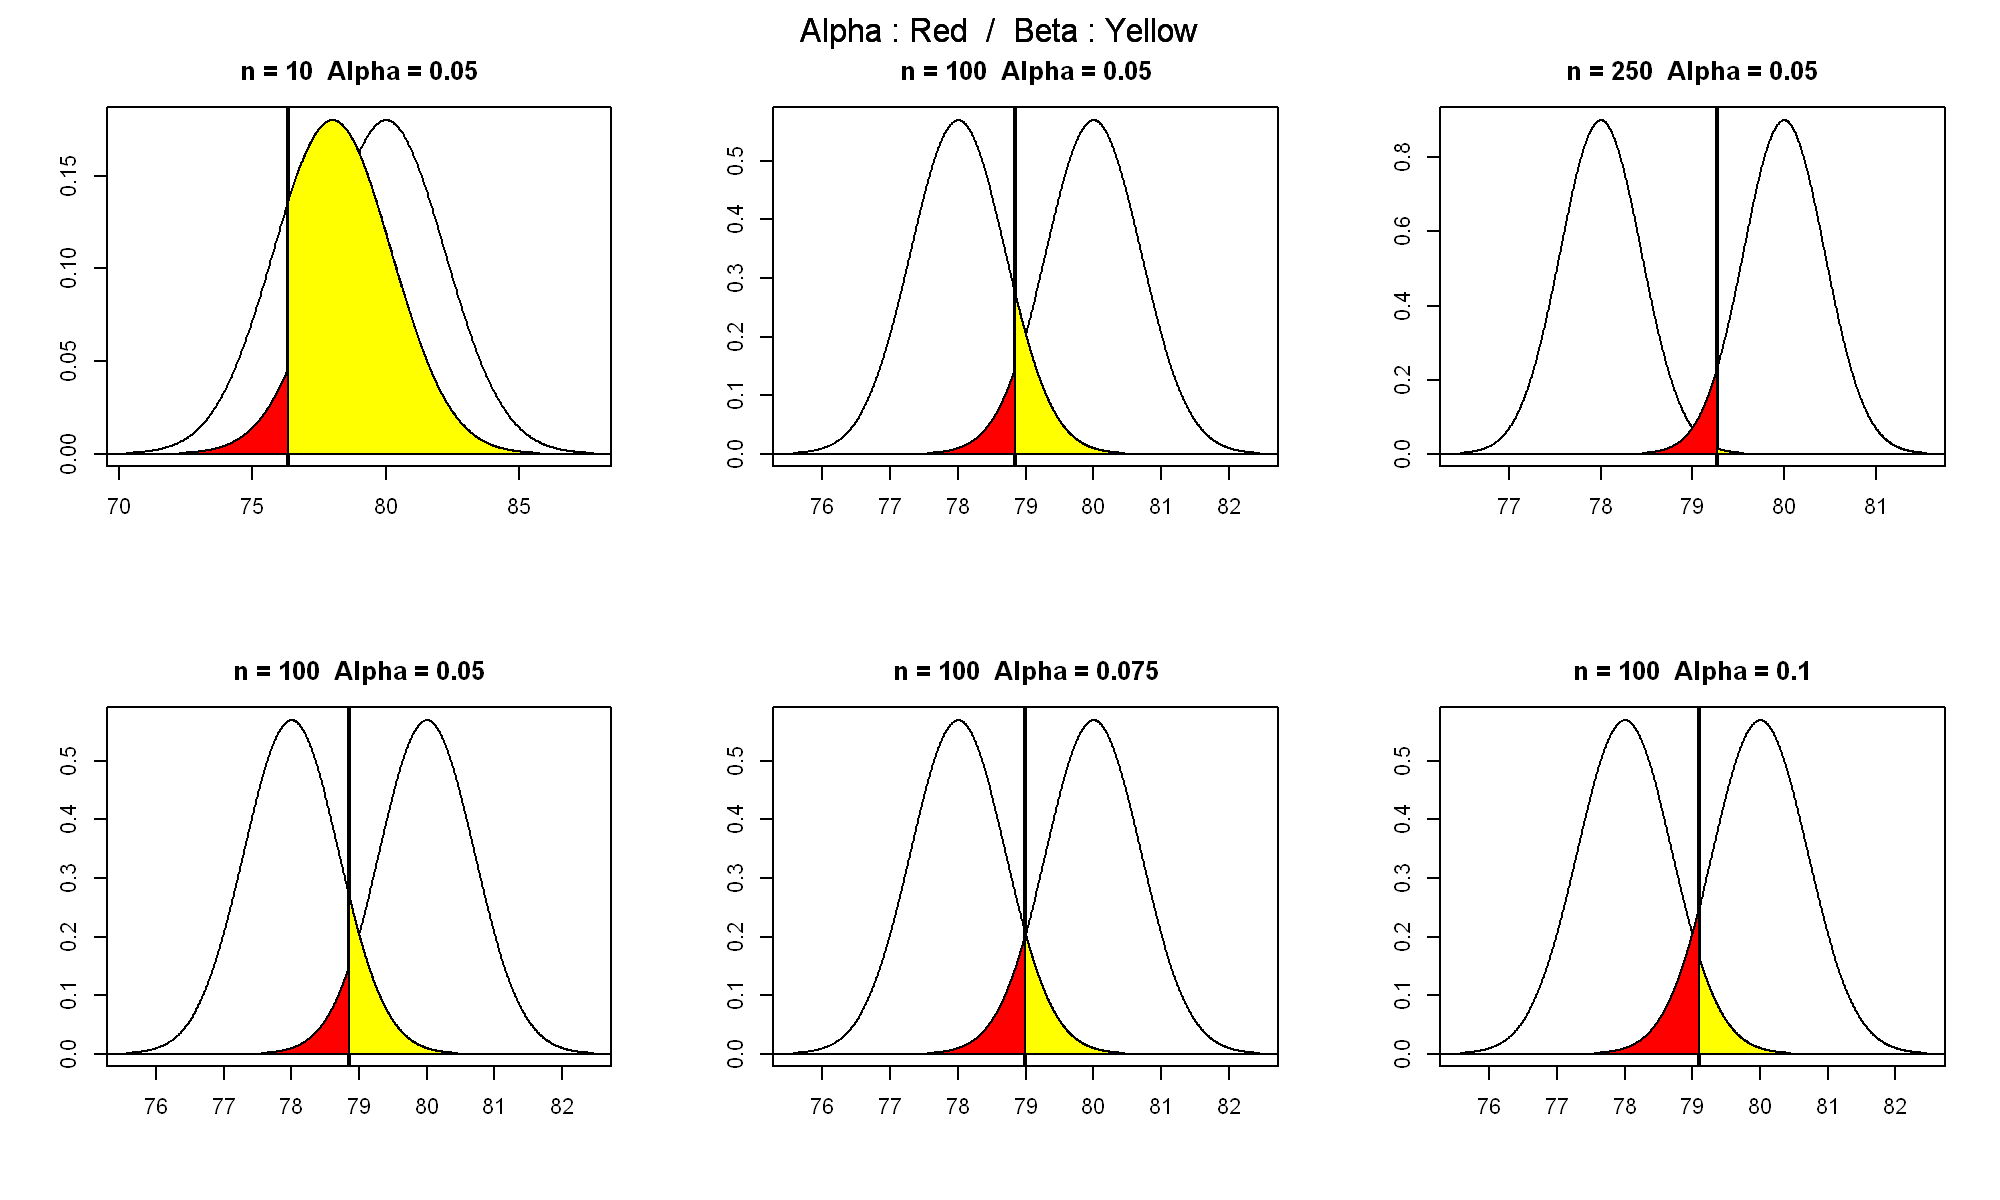

In [143]:
par(mfrow=c(2,3))

seq.n <- c(10, 100, 250)
seq.alpha <- c(0.05, 0.075, 0.1)
for(n in seq.n) {graphical.errors(0.05, n)}
for(alpha in seq.alpha) {graphical.errors(alpha, 100)}

> - Set parameters.

In [144]:
K <- 500
n <- 100
alpha <- 0.05

> - Compute alternate hypothesis acceptance threshold.

In [145]:
threshold <- m0+(sigma/sqrt(n))*qnorm(alpha, mean = 0, sd = 1)

> ***
> #### Frequency estimation of acceptance under certain a decison rule
> - ***freq.d1*** represents the frequency of the samples of size n for which the estimation of the mean allowed us to accept H1.

In [146]:
freq.accept.d1 <- function(K){
    freq.d1<-FALSE
    freq.d1.assymp <- FALSE
    for(k in 1:K) { freq.d1 <- freq.d1 + (mean(rnorm(n,m0,sigma)) < threshold)
                    freq.d1.assymp <-  rbind(freq.d1.assymp,freq.d1/k)
                  }
    return(freq.d1.assymp)
}

> - Plottic asymptotic behavior of **freq.d1**

In [147]:
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res = 160)

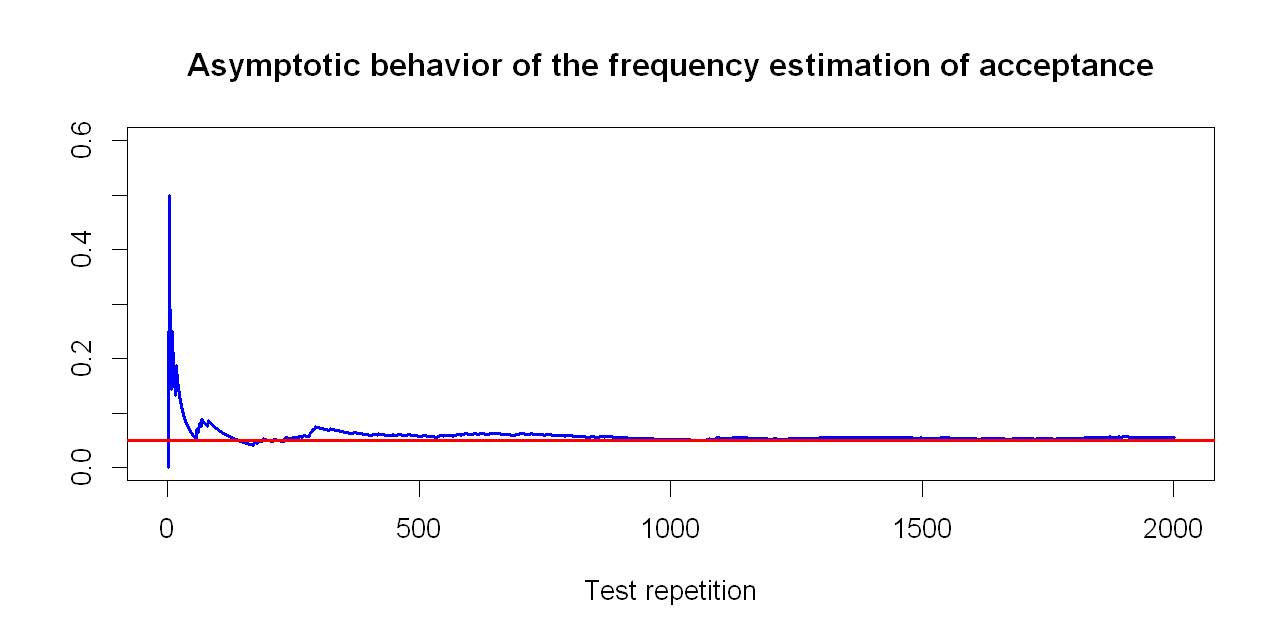

In [148]:
y <- freq.accept.d1(2000)
x <- 1:2001
plot(x,y[,1], main="Asymptotic behavior of the frequency estimation of acceptance",xlab="Test repetition",ylab="",col="blue",type='l',ylim=c(0,max(y[,1]*1.2)),lwd=2)
abline(h=alpha,col="red",lwd=2)

> *** 
> #### Asymptotic behavior of the decision rule threshold

In [149]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 150)

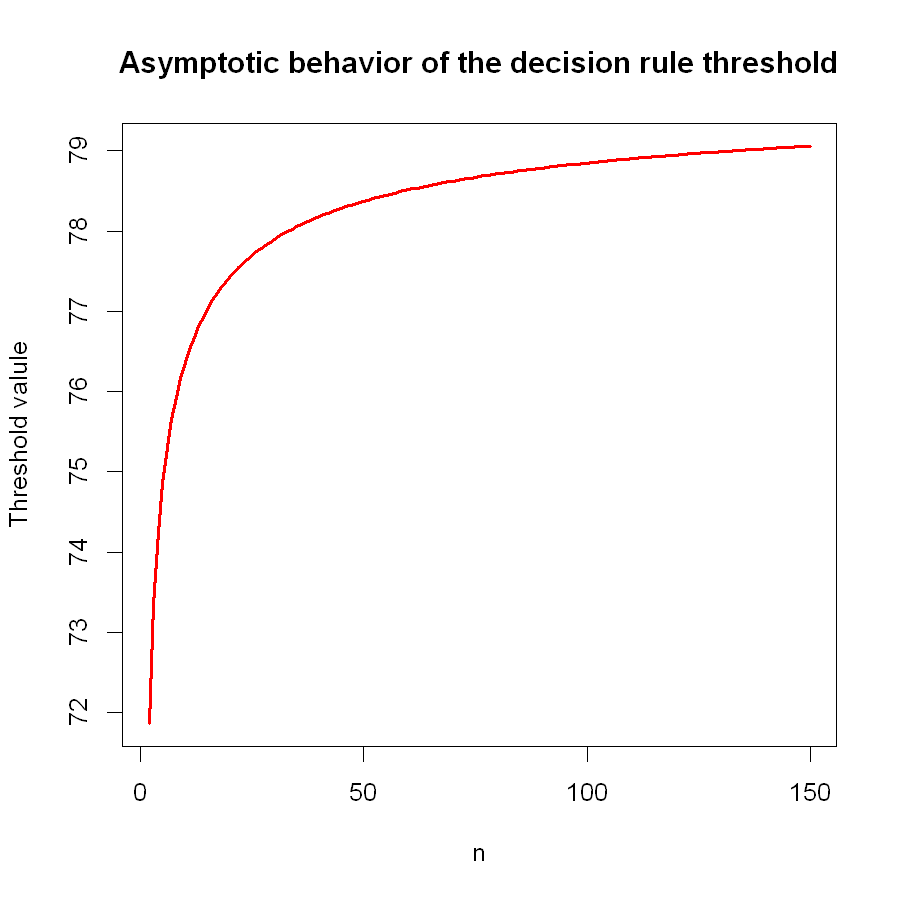

In [150]:
t <- NULL 

for (n in 2:150) {t <- c(t, m0+(sigma/sqrt(n))*qnorm(alpha,mean=0,sd=1))}

n <- 2:150
plot(n,t,main="Asymptotic behavior of the decision rule threshold",xlab="n",ylab="Threshold valule",col="red",type='l',lwd=2)
n <- 2:150

> ***
> #### Power Curves - True Positive
> - Function plotting the curve of power $1-\beta$ known as "true positive" for samples of different size $n$ for a given $\alpha$.

In [151]:
plot.power <- function(alpha, col){

#First sample size
n=10

#Computation
m.H1 <- seq(m0-2*sigma,m0,length=500)
threshold <- m0 - qnorm(1-alpha)*sigma/sqrt(n)
power <-pnorm((sqrt(n)/sigma)*(threshold-m.H1), mean = 0, sd = 1)

#Plots
plot(m.H1,
     power,
     type="l",
     main=paste("alpha = ", alpha),
     xlim=c(min(m.H1),max(m.H1)+1),
     ylim=c(min(power),1),
     sub ="", 
     xlab="H1", 
     ylab=expression(1-beta), 
     lwd =2, 
     col =col[1])

i <- 1
for(n in c(25,50,100,150)) {
    i <- i + 1
    threshold <- m0 - qnorm(1-alpha)*sigma/sqrt(n)
    power <- pnorm(threshold,m.H1,sigma/sqrt(n))
    lines(m.H1, power, type = "l", lwd = 2, col=col[i])
    legend(min(m.H1),
           0.9,
           cex=1,
           lty=1,
           lwd=2,
           bty='n',
           legend=paste("n = ",
                        c(10,25,50,100,150)),
           col=col)
    }
}

> - Plotting the power curves for different values of $\alpha$.

In [152]:
options(repr.plot.width=12, repr.plot.height=8, repr.plot.res = 180)

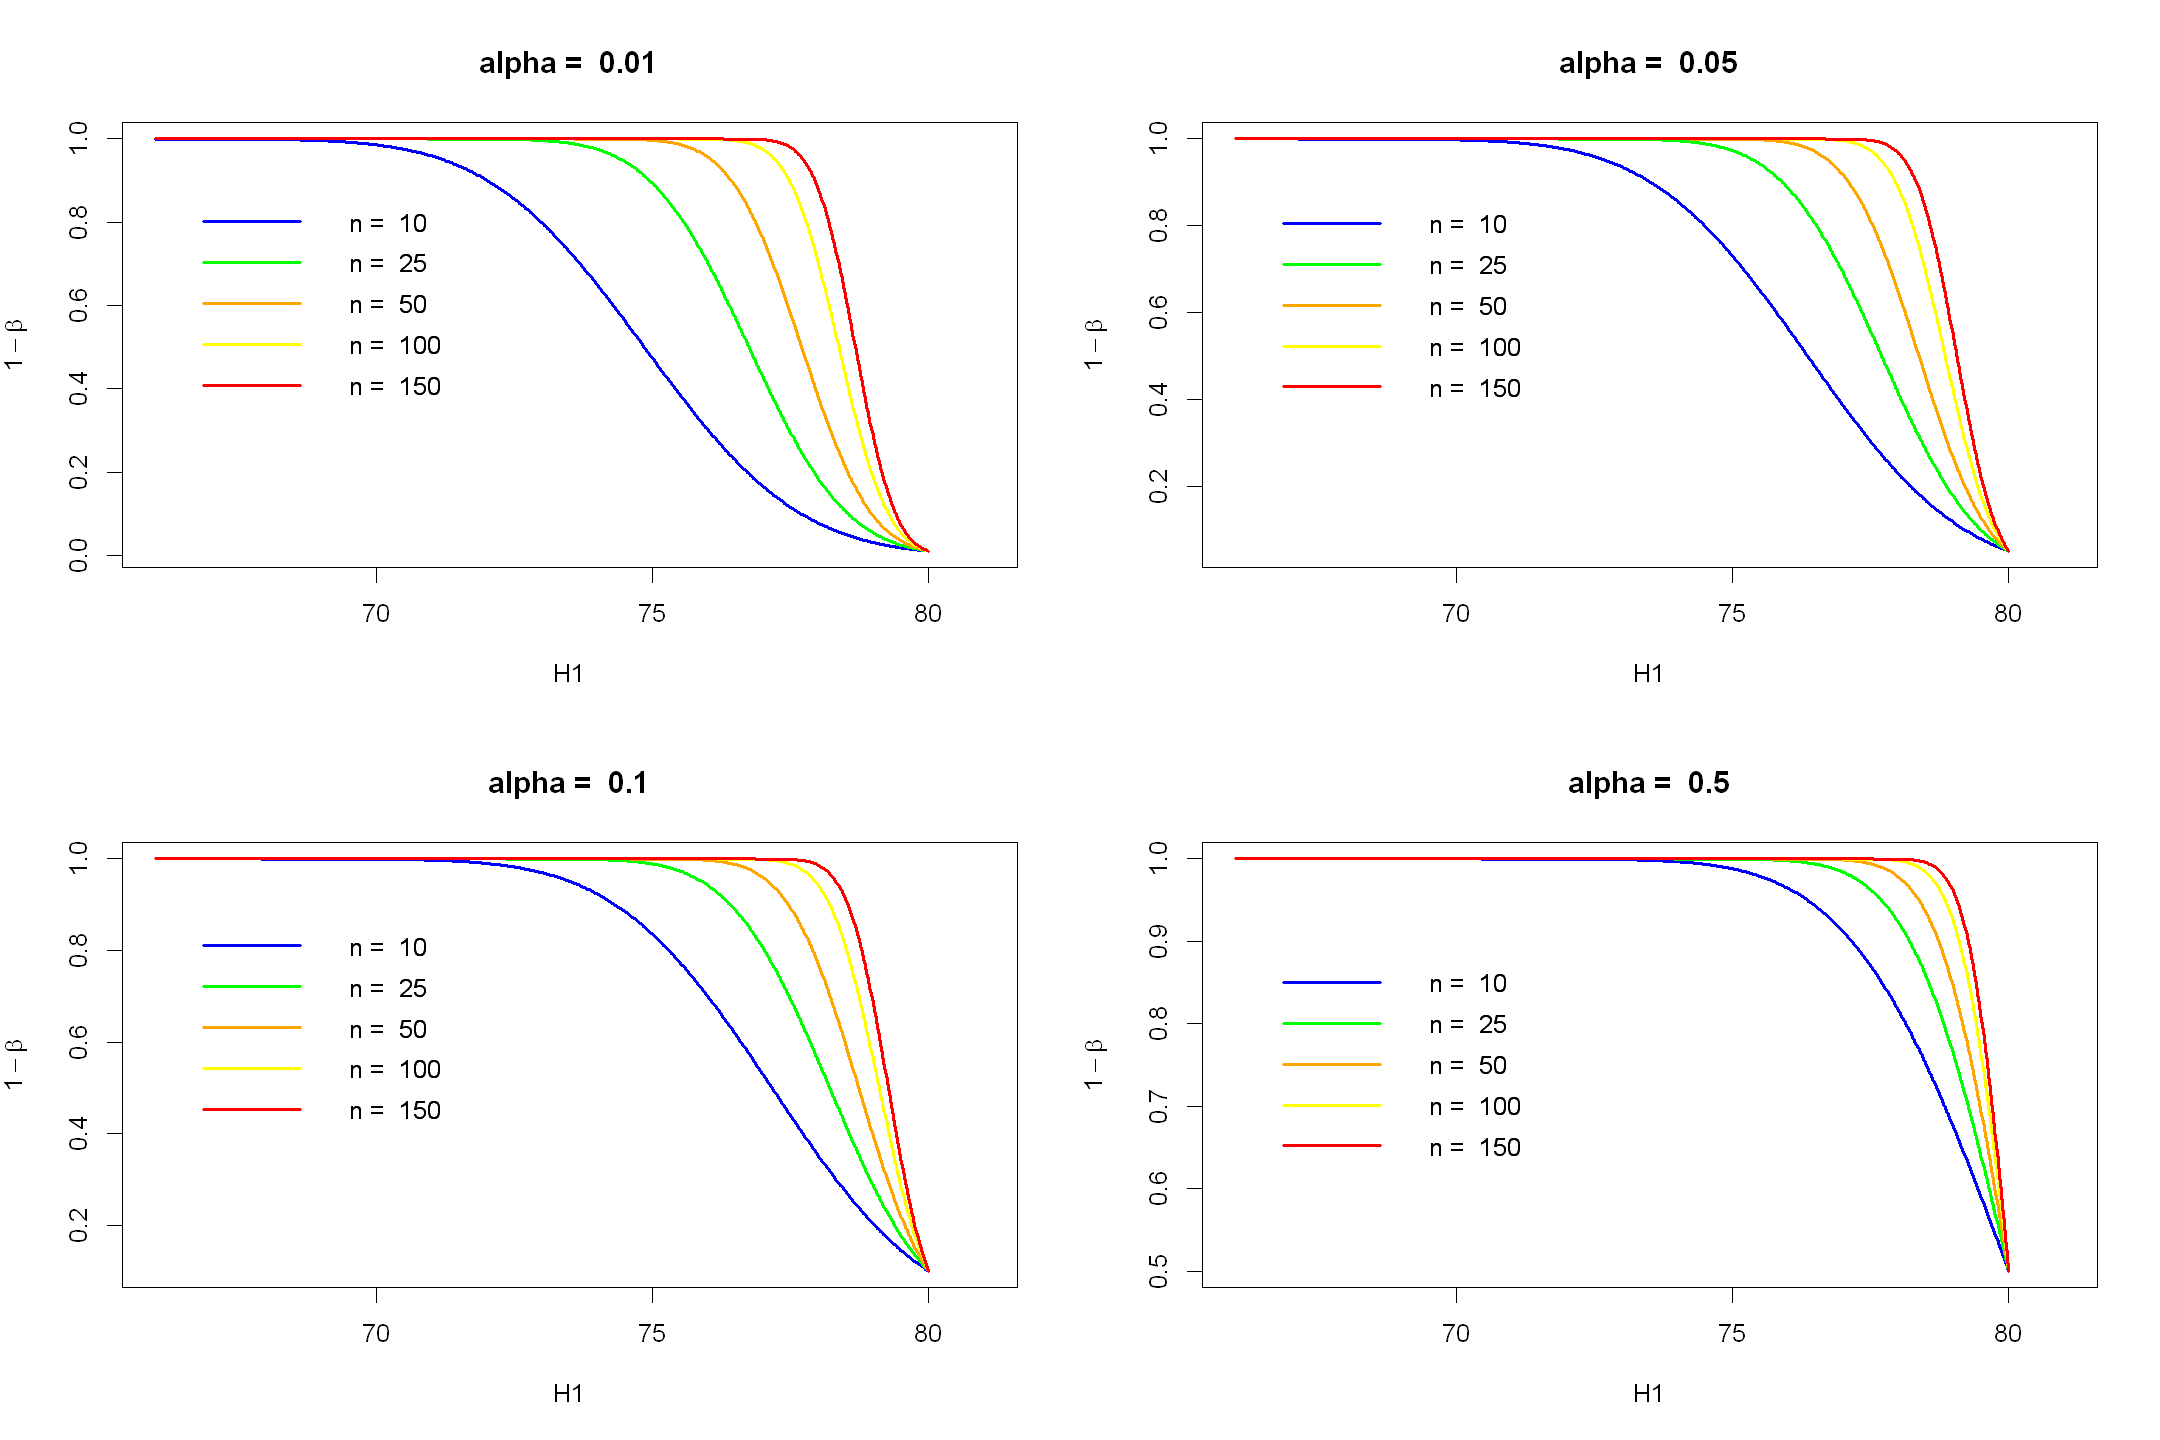

In [153]:
par(mfrow=c(2,2))

col <- c("blue","green","orange","yellow","red")
seq.alpha <- c(0.01, 0.05, 0.1, 0.5)
for(alpha in seq.alpha) {plot.power(alpha, col)}

> ***
> #### Type II Error - False Negative
> - Function plotting the curve $\beta$ known as "false negative" for samples of different size $n$ for a given $\alpha$.

In [154]:
plot.beta <- function(alpha, col){

#First sample size
n=10

#Computation
m.H1 <- seq(m0-2*sigma,m0,length=500)
threshold <- m0 - qnorm(1-alpha)*sigma/sqrt(n)
beta <- 1-pnorm((sqrt(n)/sigma)*(threshold-m.H1),mean=0,sd=1)

#Plots
plot(m.H1,
     beta,
     type="l",
     main=paste("alpha = ", alpha),
     xlim=c(min(m.H1),max(m.H1)+2),
     ylim=c(min(beta),1),
     sub ="", 
     xlab="H1", 
     ylab=expression(beta), 
     lwd =2, 
     col =col[1])

i <- 1
for(n in c(25,50,100,150)) {
    i <- i + 1
    threshold <- m0 - qnorm(1-alpha)*sigma/sqrt(n)
    beta <- 1 - pnorm(threshold,m.H1,sigma/sqrt(n))
    lines(m.H1, beta, type = "l", lwd = 2, col=col[i])
    legend(min(m.H1),
           0.9,
           cex=1,
           lty=1,
           lwd=2,
           bty='n',
           legend=paste("n = ",
                        c(10,25,50,100,150)),
           col=col)
    }
}

> - Plotting the power curves for different values of $\alpha$.

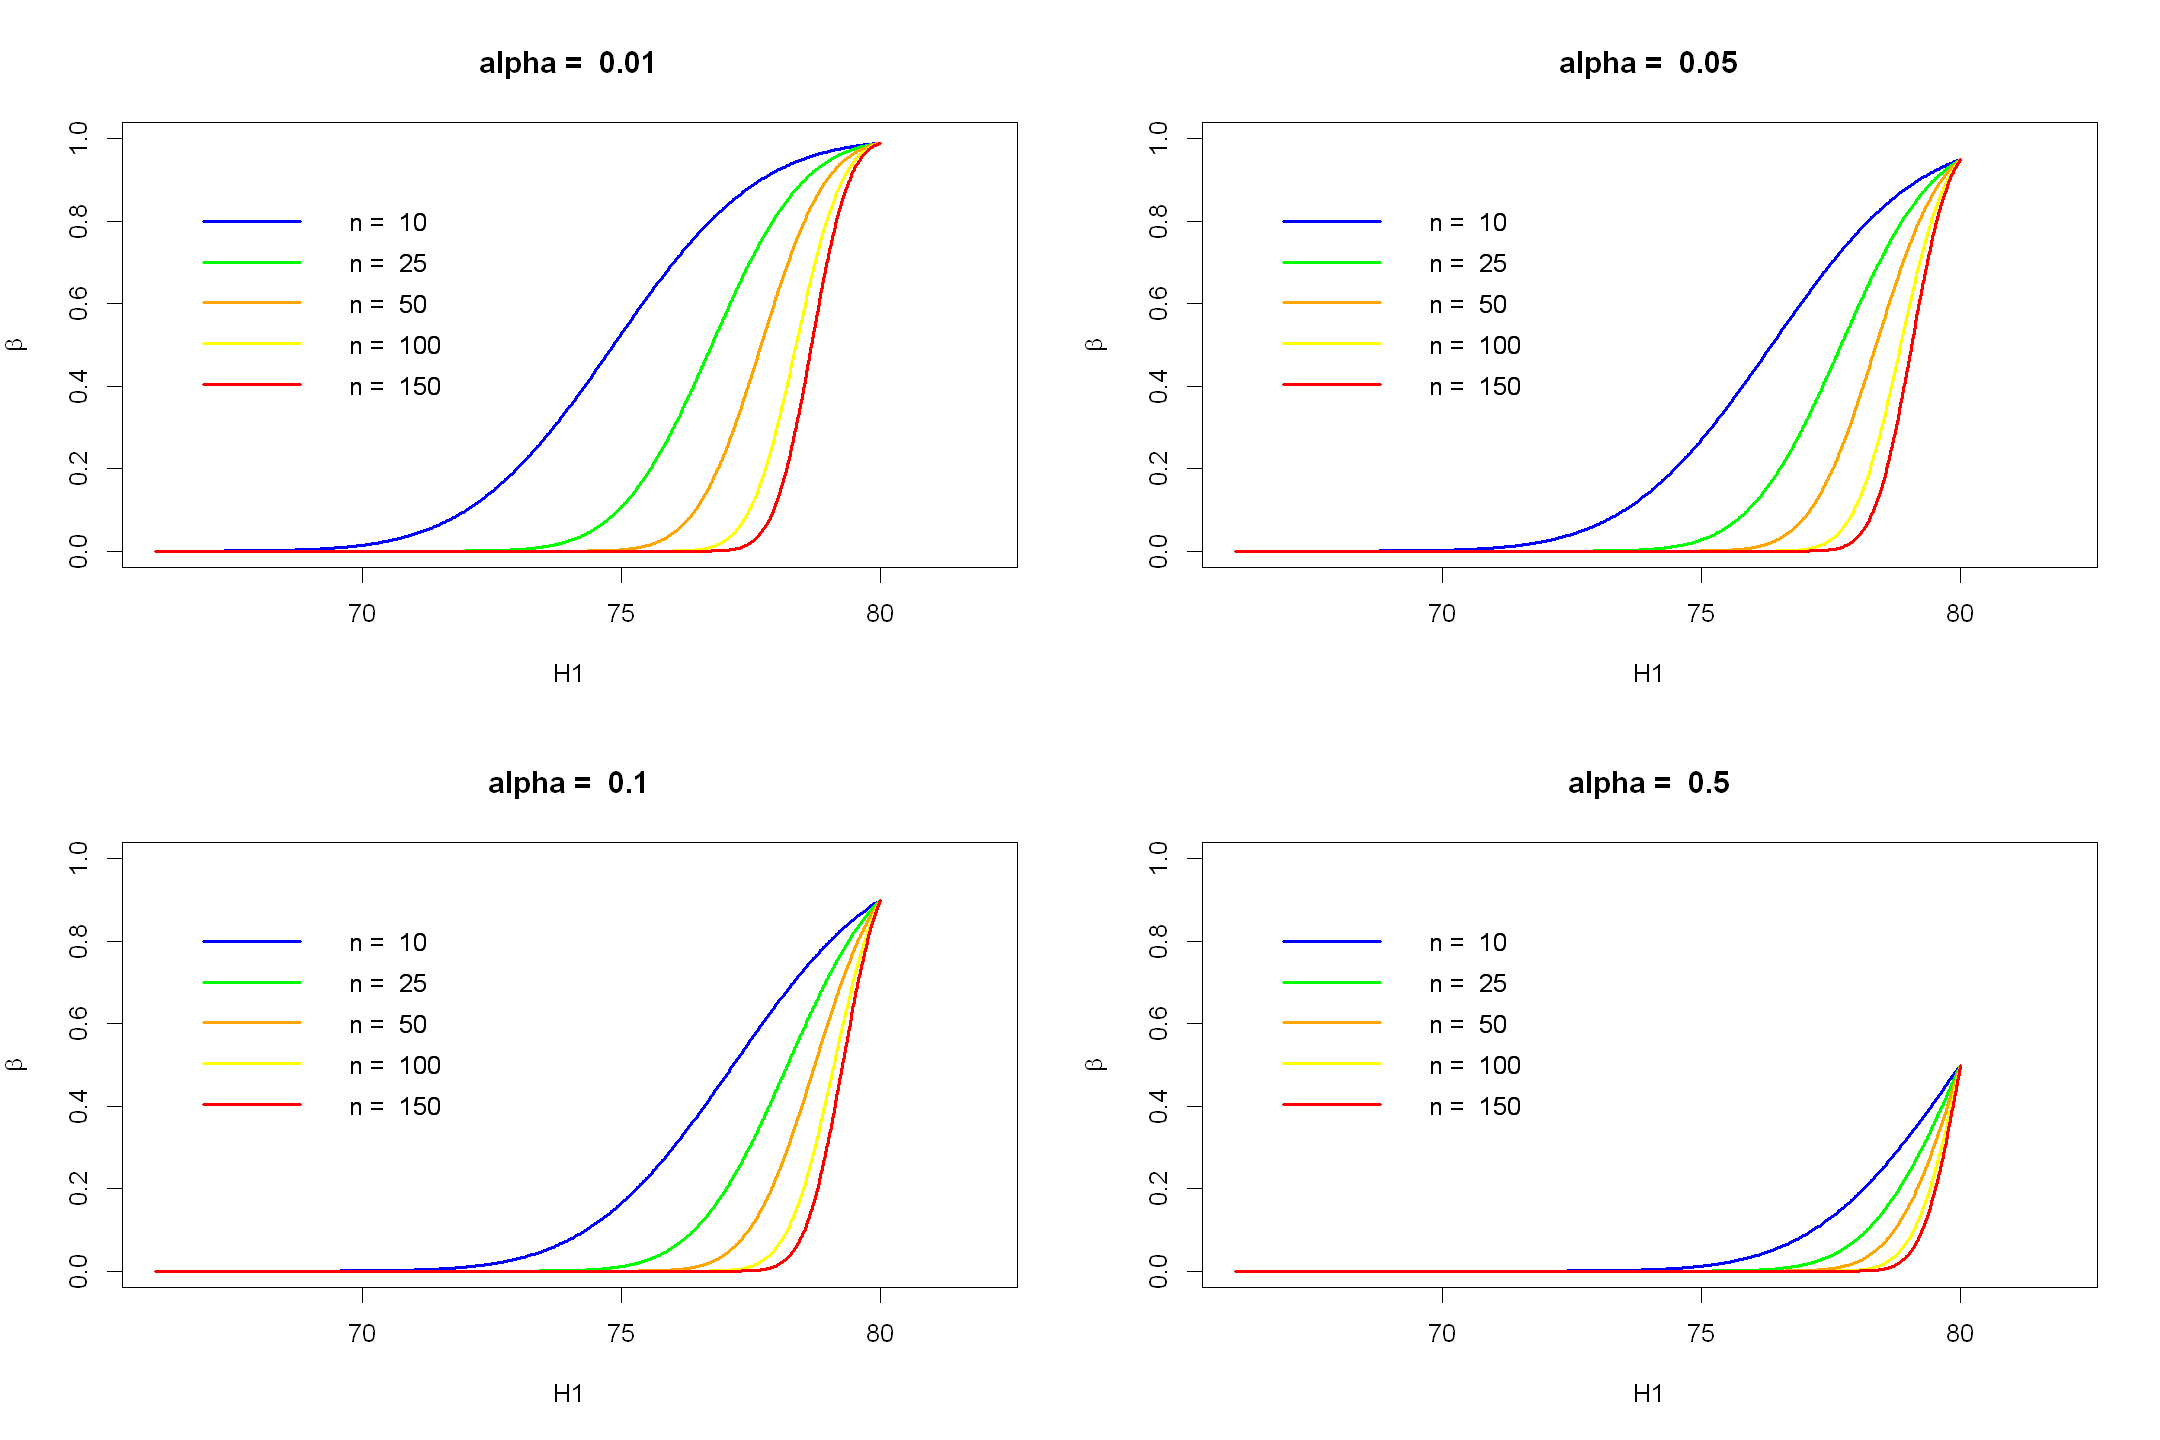

In [155]:
par(mfrow=c(2,2))

col <- c("blue","green","orange","yellow","red")
seq.alpha <- c(0.01, 0.05, 0.1, 0.5)
for(alpha in seq.alpha) {plot.beta(alpha, col)}

***